### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
### 1
# load the dataset/CSV
sats = open("sat_scores.csv", "r")
# into list of dictionaries
sat_ls = list(csv.reader(sats))
sat_ls[0:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [3]:
# create dictionary
sat_dic = {}
# create lists per column
state = []
rate = []
verbal = []
math = []
## loop through each key, value pair in internal dictionary
for i in range(1,len(sat_ls)):
### check if key is in output dictionary
    state.append(sat_ls[i][0])
    rate.append(sat_ls[i][1])
    verbal.append(sat_ls[i][2])
    math.append(sat_ls[i][3])
        
sat_dic[sat_ls[0][0]] = state
sat_dic[sat_ls[0][1]] = rate
sat_dic[sat_ls[0][2]] = verbal
sat_dic[sat_ls[0][3]] = math

In [4]:
sat_dic.items()

dict_items([('State', ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']), ('Rate', ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45']), ('Verbal', ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# make DF from CSV file and dictionary
sat_scores = pd.read_csv('sat_scores.csv')
sat_df = pd.DataFrame.from_dict(sat_dic)

In [6]:
sat_df.head(2)

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513

In [7]:
sat_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
sat_df = sat_df.astype({"Rate":"int64", "Verbal":"int64", "Math":"int64"})

In [9]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
sat_df.head(2)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513

In [11]:
sat_scores.head(2)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513

In [12]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [13]:
sat_scores.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
data_dic = {
    'columns': list(sat_scores.columns),
    'type': list(sat_scores.dtypes),
    'description': {'State': 'US state', 'Rate': 'Participation Rate','Verbal': 'Verbal Score', 'Math': 'Math Score'},
    'shape': list(sat_scores.shape),
}
data_dic

{'columns': ['State', 'Rate', 'Verbal', 'Math'],
 'type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')],
 'description': {'State': 'US state',
  'Rate': 'Participation Rate',
  'Verbal': 'Verbal Score',
  'Math': 'Math Score'},
 'shape': [52, 4]}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [15]:
# histplot - rate

Rate1 = sns.histplot(sat_scores['Rate'], kde=False, bins=10)
Rate1.set(xlabel='Participation Rate')
Rate1.set_title('Pass Rate Distribution Per Participant')

Text(0.5, 1.0, 'Pass Rate Distribution Per Participant')

In [16]:
# histplot - Math

Math1 = sns.histplot(sat_scores['Math'], kde=False, bins=10)
Math1.set(xlabel='Math Score')
Math1.set_title('Math Score Distribution Per Participant')

Text(0.5, 1.0, 'Math Score Distribution Per Participant')

Text(0.5, 1.0, 'Verbal Score Distribution Per Participant')

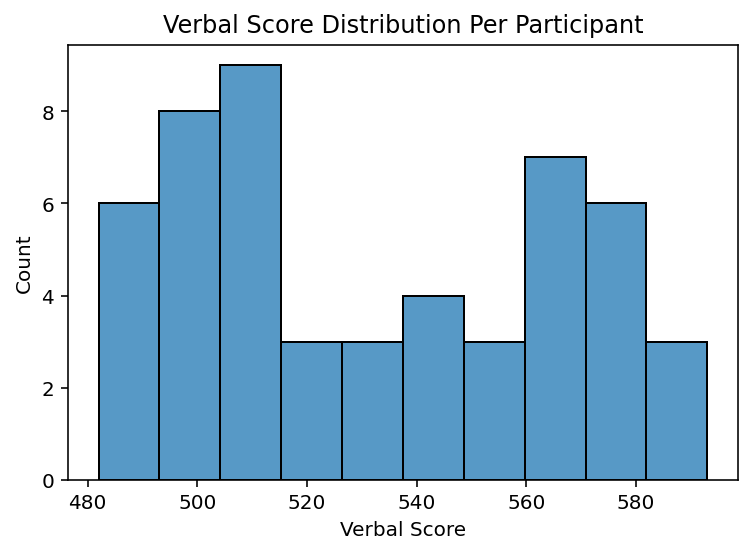

In [17]:
# histplot - Verbal

Verbal1 = sns.histplot(sat_scores['Verbal'], kde=False, bins=10)
Verbal1.set(xlabel='Verbal Score')
Verbal1.set_title('Verbal Score Distribution Per Participant')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

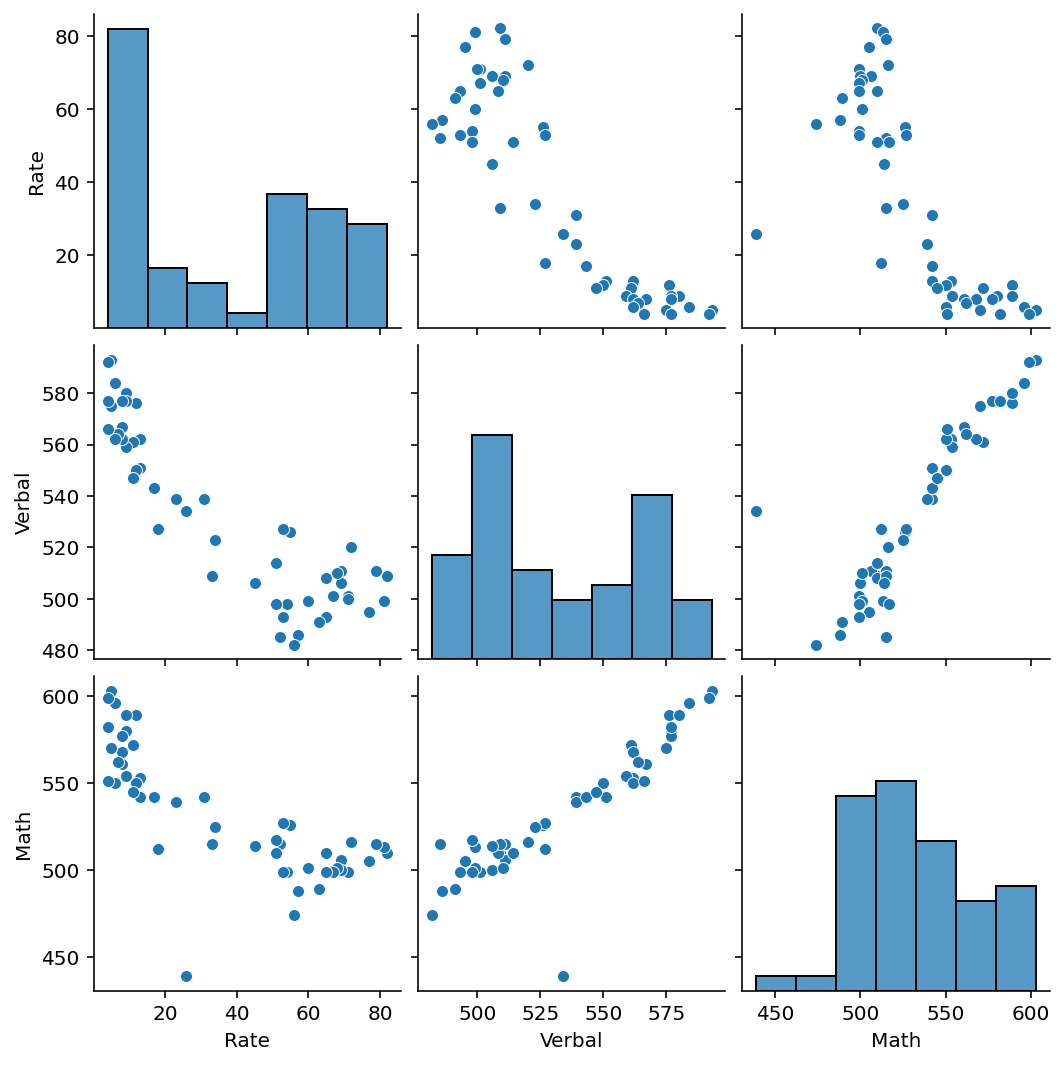

In [18]:
sns.pairplot(sat_scores)

In [19]:
# Maths & verbal highly correlated; also same scales used

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [20]:
# stacked histogram 'hist' 'stacked=true'

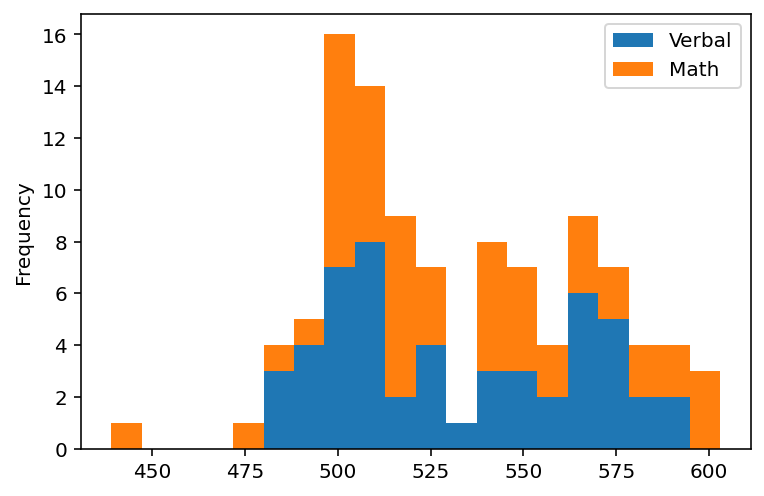

In [21]:
sat_scores[['Verbal','Math']].plot.hist(stacked=True, bins=20);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

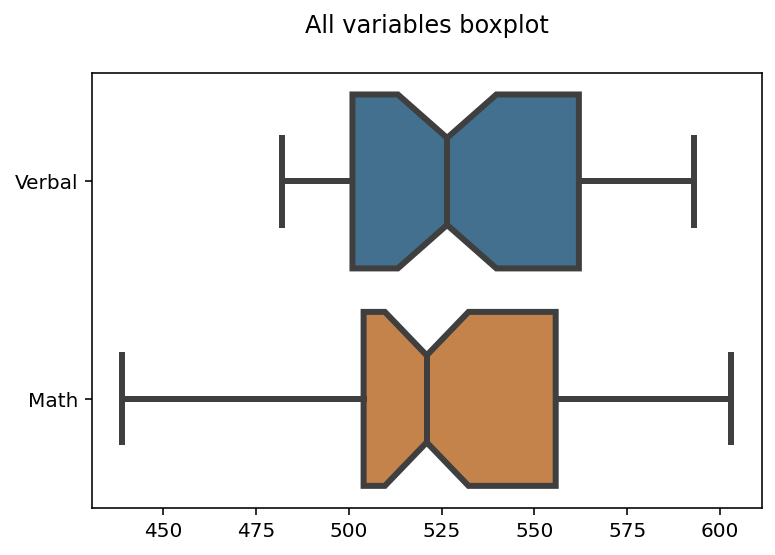

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores[['Verbal','Math']], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

In [23]:
# rate uses different metrics / looks at a different data set for its reults vs verbal and math which are both score based metrics.

# Thats why you cannot put rate in the same category

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


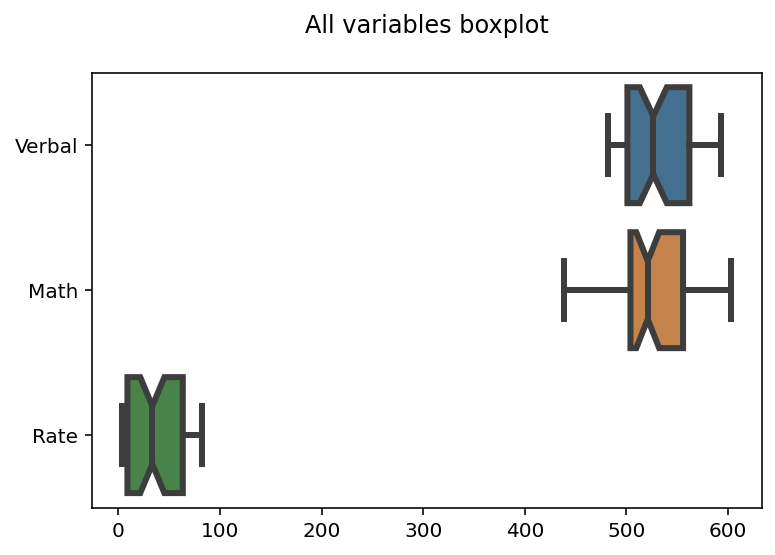

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores[['Verbal','Math', 'Rate']], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

In [25]:
# Need to change scale of the rate as it is different from the maths and verbal columns
# RATE SV

In [26]:
rate_mean = sat_scores.Rate.mean()
rate_std = sat_scores.Rate.std()
print("Mean: ", rate_mean, ", Standard deviation: ", rate_std)

Mean:  37.15384615384615 , Standard deviation:  27.301788072869286


In [27]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [28]:
rate_stand = var_standardized(sat_scores.Rate)
print("Mean: ", rate_stand.mean(), ", Standard deviation: ", rate_stand.std())
# not exactly a mean of 0 but excruciatingly close

Mean:  2.1670699422971805e-16 , Standard deviation:  0.9999999999999997


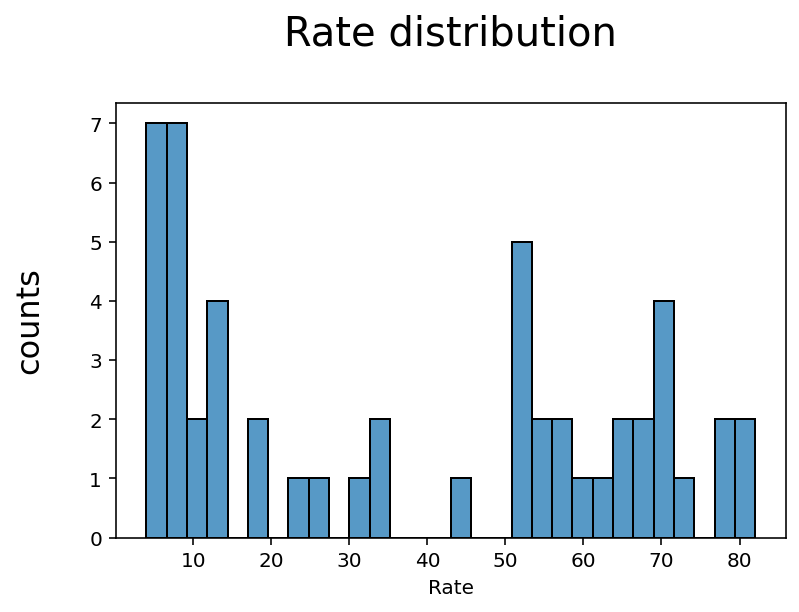

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(sat_scores.Rate, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Rate distribution\n', fontsize=20)
plt.show()

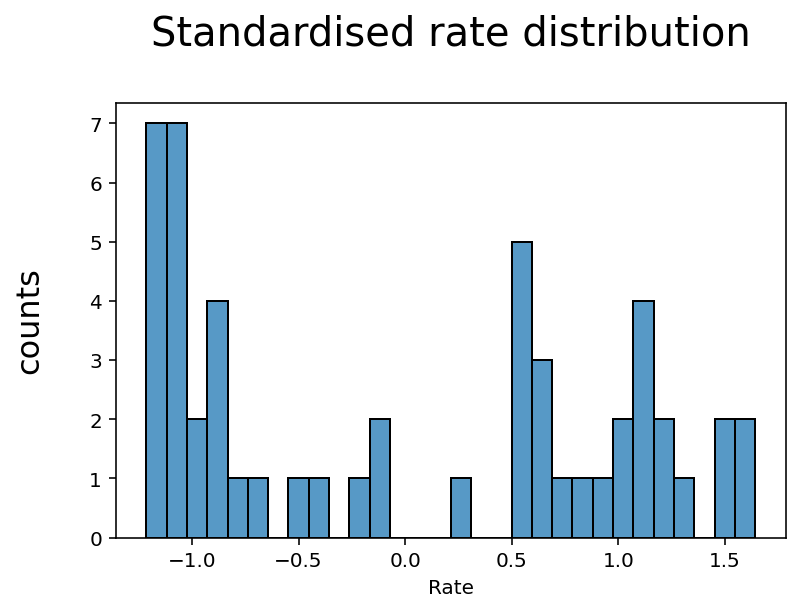

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(rate_stand, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Standardised rate distribution\n', fontsize=20)
plt.show()

In [31]:
# verbal SV

In [32]:
verbal_mean = sat_scores.Verbal.mean()
verbal_std = sat_scores.Verbal.std()
print("Mean: ", verbal_mean, ", Standard deviation: ", verbal_std)

Mean:  532.0192307692307 , Standard deviation:  33.2362254437778


In [33]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [34]:
verbal_stand = var_standardized(sat_scores.Verbal)
print("Mean: ", verbal_stand.mean(), ", Standard deviation: ", verbal_stand.std())

Mean:  1.5585823230314697e-15 , Standard deviation:  1.0000000000000002


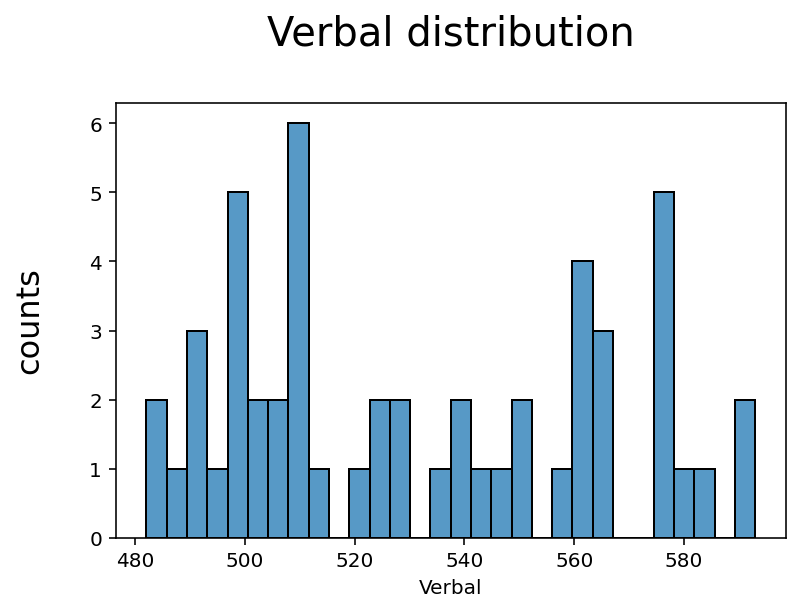

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(sat_scores.Verbal, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Verbal distribution\n', fontsize=20)
plt.show()

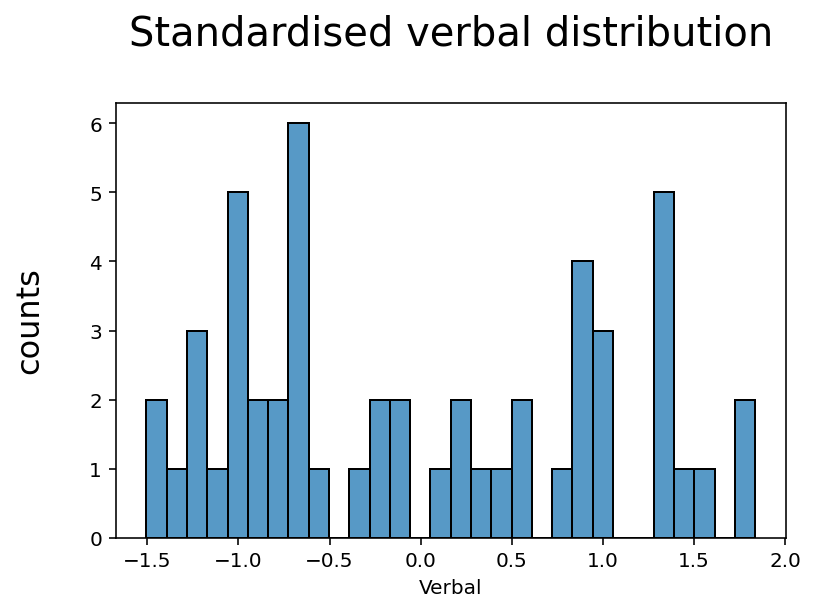

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(verbal_stand, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Standardised verbal distribution\n', fontsize=20)
plt.show()

In [37]:
# math SV

In [38]:
math_mean = sat_scores.Math.mean()
math_std = sat_scores.Math.std()
print("Mean: ", math_mean, ", Standard deviation: ", math_std)

Mean:  531.5 , Standard deviation:  36.01497509887448


In [39]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [40]:
math_stand = var_standardized(sat_scores.Math)
print("Mean: ", math_stand.mean(), ", Standard deviation: ", math_stand.std())

Mean:  -2.135044278125301e-18 , Standard deviation:  1.0


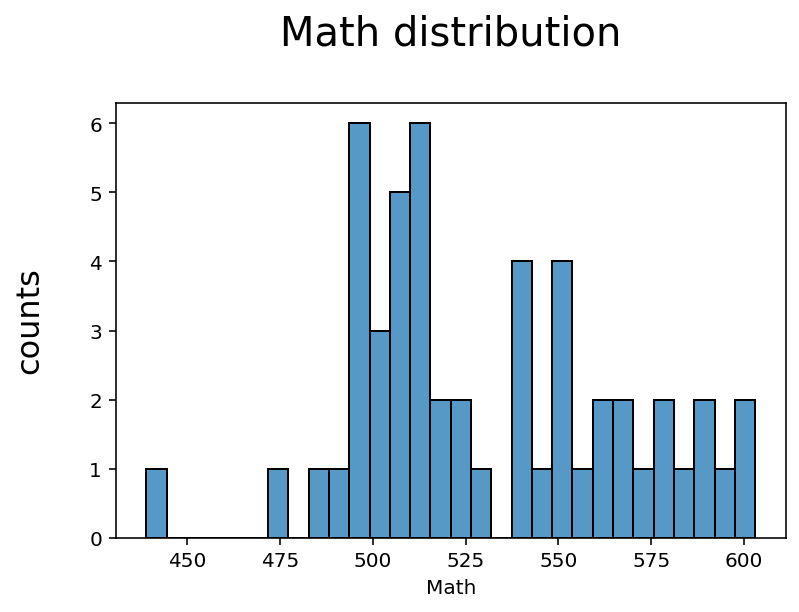

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(sat_scores.Math, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Math distribution\n', fontsize=20)
plt.show()

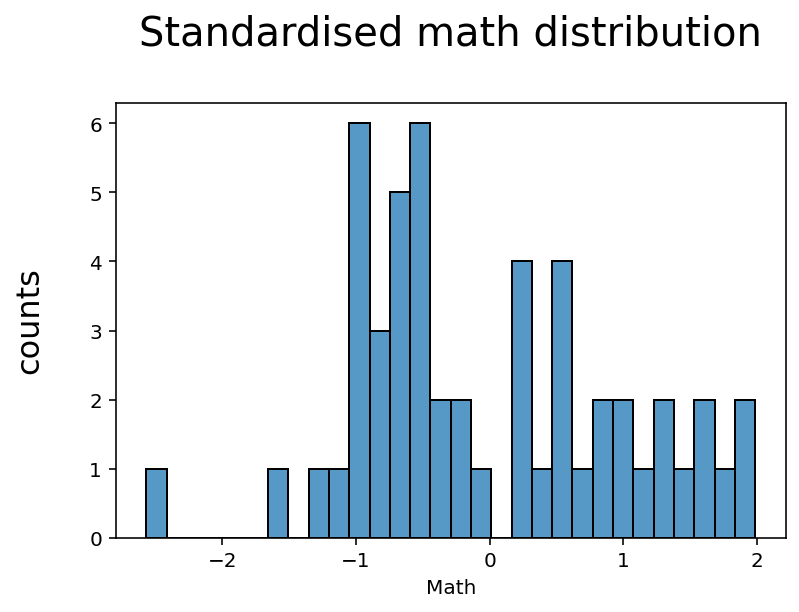

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(math_stand, bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Standardised math distribution\n', fontsize=20)
plt.show()

In [43]:
# standardise all variables

sat_scores_stand = (sat_scores - sat_scores.mean()) / sat_scores.std()
sat_scores_stand = sat_scores_stand.drop('State', axis=1)

sat_scores_stand.head()

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/719369595.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sat_scores_stand = (sat_scores - sat_scores.mean()) / sat_scores.std()


Math      Rate    Verbal
0 -0.596974  1.642609 -0.692595
1 -0.513675  1.605981 -0.993471
2 -0.458143  1.532726 -0.632419
3 -0.735805  1.459470 -1.113822
4 -0.430377  1.276332 -0.361630

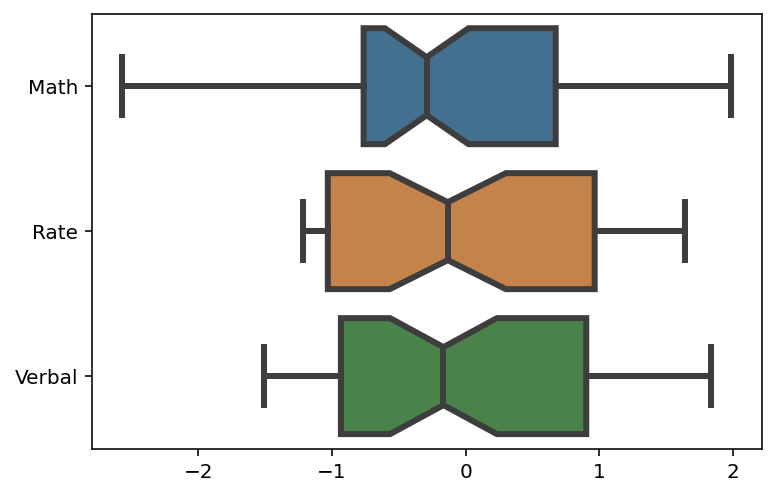

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores_stand, orient='h', fliersize=1,
            linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [45]:
sat_scores.Verbal.mean()

532.0192307692307

In [46]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.mean()]

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [47]:
# How many states above the mean?
len(sat_scores[sat_scores.Verbal > sat_scores.Verbal.mean()]['State'])

24

In [48]:
len(sat_scores.State)

52

#### What does this tell you about the distribution of Verbal scores?

With 46% (24/52) of verbal SAT scores being above the mean, this is nearly symettrically distributed

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [49]:
sat_scores.Verbal.median()

526.5

In [50]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.median()].head()

State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512

In [51]:
len(sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.median()])

26

In [52]:
sat_scores.Verbal.mean()

532.0192307692307

In [53]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.mean()].head()

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553

In [54]:
len(sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.mean()])

24

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

26 states above median vs 24 states above mean

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [55]:
sat_scores['V_M_Diff'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

State  Rate  Verbal  Math  V_M_Diff
0    CT    82     509   510        -1
1    NJ    81     499   513       -14
2    MA    79     511   515        -4
3    NY    77     495   505       -10
4    NH    72     520   516         4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [56]:
posdif = sat_scores.sort_values(by=['V_M_Diff'], ascending=False)[:10]

In [57]:
negdif = sat_scores.sort_values(by=['V_M_Diff'], ascending=True)[:10]

In [58]:
posdif.head()

State  Rate  Verbal  Math  V_M_Diff
27    OH    26     534   439        95
50    MS     4     566   551        15
29    WV    18     527   512        15
45    AR     6     562   550        12
32    NM    13     551   542         9

In [59]:
negdif.head()

State  Rate  Verbal  Math  V_M_Diff
21    HI    52     485   515       -30
23    CA    51     498   517       -19
1     NJ    81     499   513       -14
33    IL    12     576   589       -13
44    WI     6     584   596       -12

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [60]:
sat_scores.corr()

# Shows a positive correlation between math and verbal scores
## And shows a negative correlation between rat and verbal / math

Rate    Verbal      Math  V_M_Diff
Rate      1.000000 -0.886432 -0.773746 -0.101412
Verbal   -0.886432  1.000000  0.899871  0.052600
Math     -0.773746  0.899871  1.000000 -0.388219
V_M_Diff -0.101412  0.052600 -0.388219  1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [61]:
sat_scores.describe()

# columns
# Coun
# Mean
# Standard deviation
# Minimum value
# 25th percentile value
# 50th percentile value / median
# 75th percentile value
# Maximum value

Rate      Verbal        Math   V_M_Diff
count  52.000000   52.000000   52.000000  52.000000
mean   37.153846  532.019231  531.500000   0.519231
std    27.301788   33.236225   36.014975  15.729939
min     4.000000  482.000000  439.000000 -30.000000
25%     9.000000  501.000000  504.000000  -6.000000
50%    33.500000  526.500000  521.000000   0.000000
75%    63.500000  562.000000  555.750000   4.250000
max    82.000000  593.000000  603.000000  95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset
1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [62]:
sat_scores.cov()

Rate       Verbal         Math    V_M_Diff
Rate      745.387632  -804.355958  -760.803922  -43.552036
Verbal   -804.355958  1104.646682  1077.147059   27.499623
Math     -760.803922  1077.147059  1297.078431 -219.931373
V_M_Diff  -43.552036    27.499623  -219.931373  247.430995

In [63]:
sat_scores.corr()

Rate    Verbal      Math  V_M_Diff
Rate      1.000000 -0.886432 -0.773746 -0.101412
Verbal   -0.886432  1.000000  0.899871  0.052600
Math     -0.773746  0.899871  1.000000 -0.388219
V_M_Diff -0.101412  0.052600 -0.388219  1.000000

In [64]:
## Describe how the covariance matrix is different from the correlation matrix.

# Covariance is the sum of deviations from the mean of variable 1, times deviations from the mean of variable 2.
# Correlation is covariance variable 1 & 2 divided by the standard deviation of variable 1 & 2.

## What is the process to convert the covariance into the correlation?

# By dividing the covariance with the standard deviations

## Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

#Because the covariance is not interpretable, values are difficult to read. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [65]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.sort_values('age', ascending=True)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0                -  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2                -  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16               -  ...            0.0                   -               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 

In [66]:
# This data DOES require cleaning, as missing data (expressed with dashes) are evident in more than one column

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [67]:
drugs.shape

(17, 28)

In [68]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [69]:
drugs.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  crack-use  heroin-use  \
count            17.000000    17.000000  17.000000   17.000000   
mean             42.941176     2.176471   0.294118    0.352941   
std              18.362566     1.816772   0.235772    0.333762   
min               4.000000     0.000000   0.000000    0.000000   
25%              30.000000     0.500000   0.000000    0.100000   
50%              52.000000     2.000000   0.400000    0.200000   
75%              52.000000     4.000000   0.500000    0.600000   
max              72.000000     4.900000   0.600000    1.100000   

       hallucinogen-use  hallucinogen-frequency  ...  pain-releiver-use  \
count         17.000000               17.000000  ...          17.000000   
mean           3.394118                8.411765  ...           6.270588   
std            2.792506               15.000245  ...           3.166379   
min            0.100000                2.000000  ...           0.600000   
25%            0.600000                3.000000  ...           3.900000   
50%            3.200000                3.000000  ...           6.200000   
75%            5.200000                4.000000  ...           9.000000   
max            8.600000               52.000000  ...          10.000000   

       pain-releiver-frequency  oxycontin-use  tranquilizer-use  \
count                17.000000      17.000000         17.000000   
mean                 14.705882       0.935294          2.805882   
std                   6.935098       0.608216          1.753379   
min                   7.000000       0.000000          0.200000   
25%                  12.000000       0.400000          1.400000   
50%                  12.000000       1.100000          3.500000   
75%                  15.000000       1.400000          4.200000   
max                  36.000000       1.700000          5.400000   

       tranquilizer-frequency  stimulant-use  stimulant-frequency   meth-use  \
count               17.000000      17.000000            17.000000  17.000000   
mean                11.735294       1.917647            31.147059   0.382353   
std                 11.485205       1.407673            85.973790   0.262762   
min                  4.500000       0.000000             2.000000   0.000000   
25%                  6.000000       0.600000             7.000000   0.200000   
50%                 10.000000       1.800000            10.000000   0.400000   
75%                 11.000000       3.000000            12.000000   0.600000   
max                 52.000000       4.100000           364.000000   0.900000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 21 columns]

In [70]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [71]:
# Age has individual ages but then age ranges, hence its 'object' dtype
## n is number of people in that age bracket
### 6 other columns are object dtype when they should be floats, this likely means missing or corrupt data

In [72]:
print(drugs['meth-frequency'].unique())
print(drugs['cocaine-frequency'].unique())
print(drugs['heroin-frequency'].unique())
print(drugs['inhalant-frequency'].unique())
print(drugs['oxycontin-frequency'].unique())
print(drugs['meth-frequency'].unique())

['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']
['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [73]:
# all object entries appear to be due to dashes - instead of 0's. Below changes that

drugs.replace("-", 0 , inplace = True)

for i in range(0, len(drugs.columns)):
    drugs.iloc[:,i] = pd.to_numeric(drugs.iloc[:,i], errors='ignore')
    
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

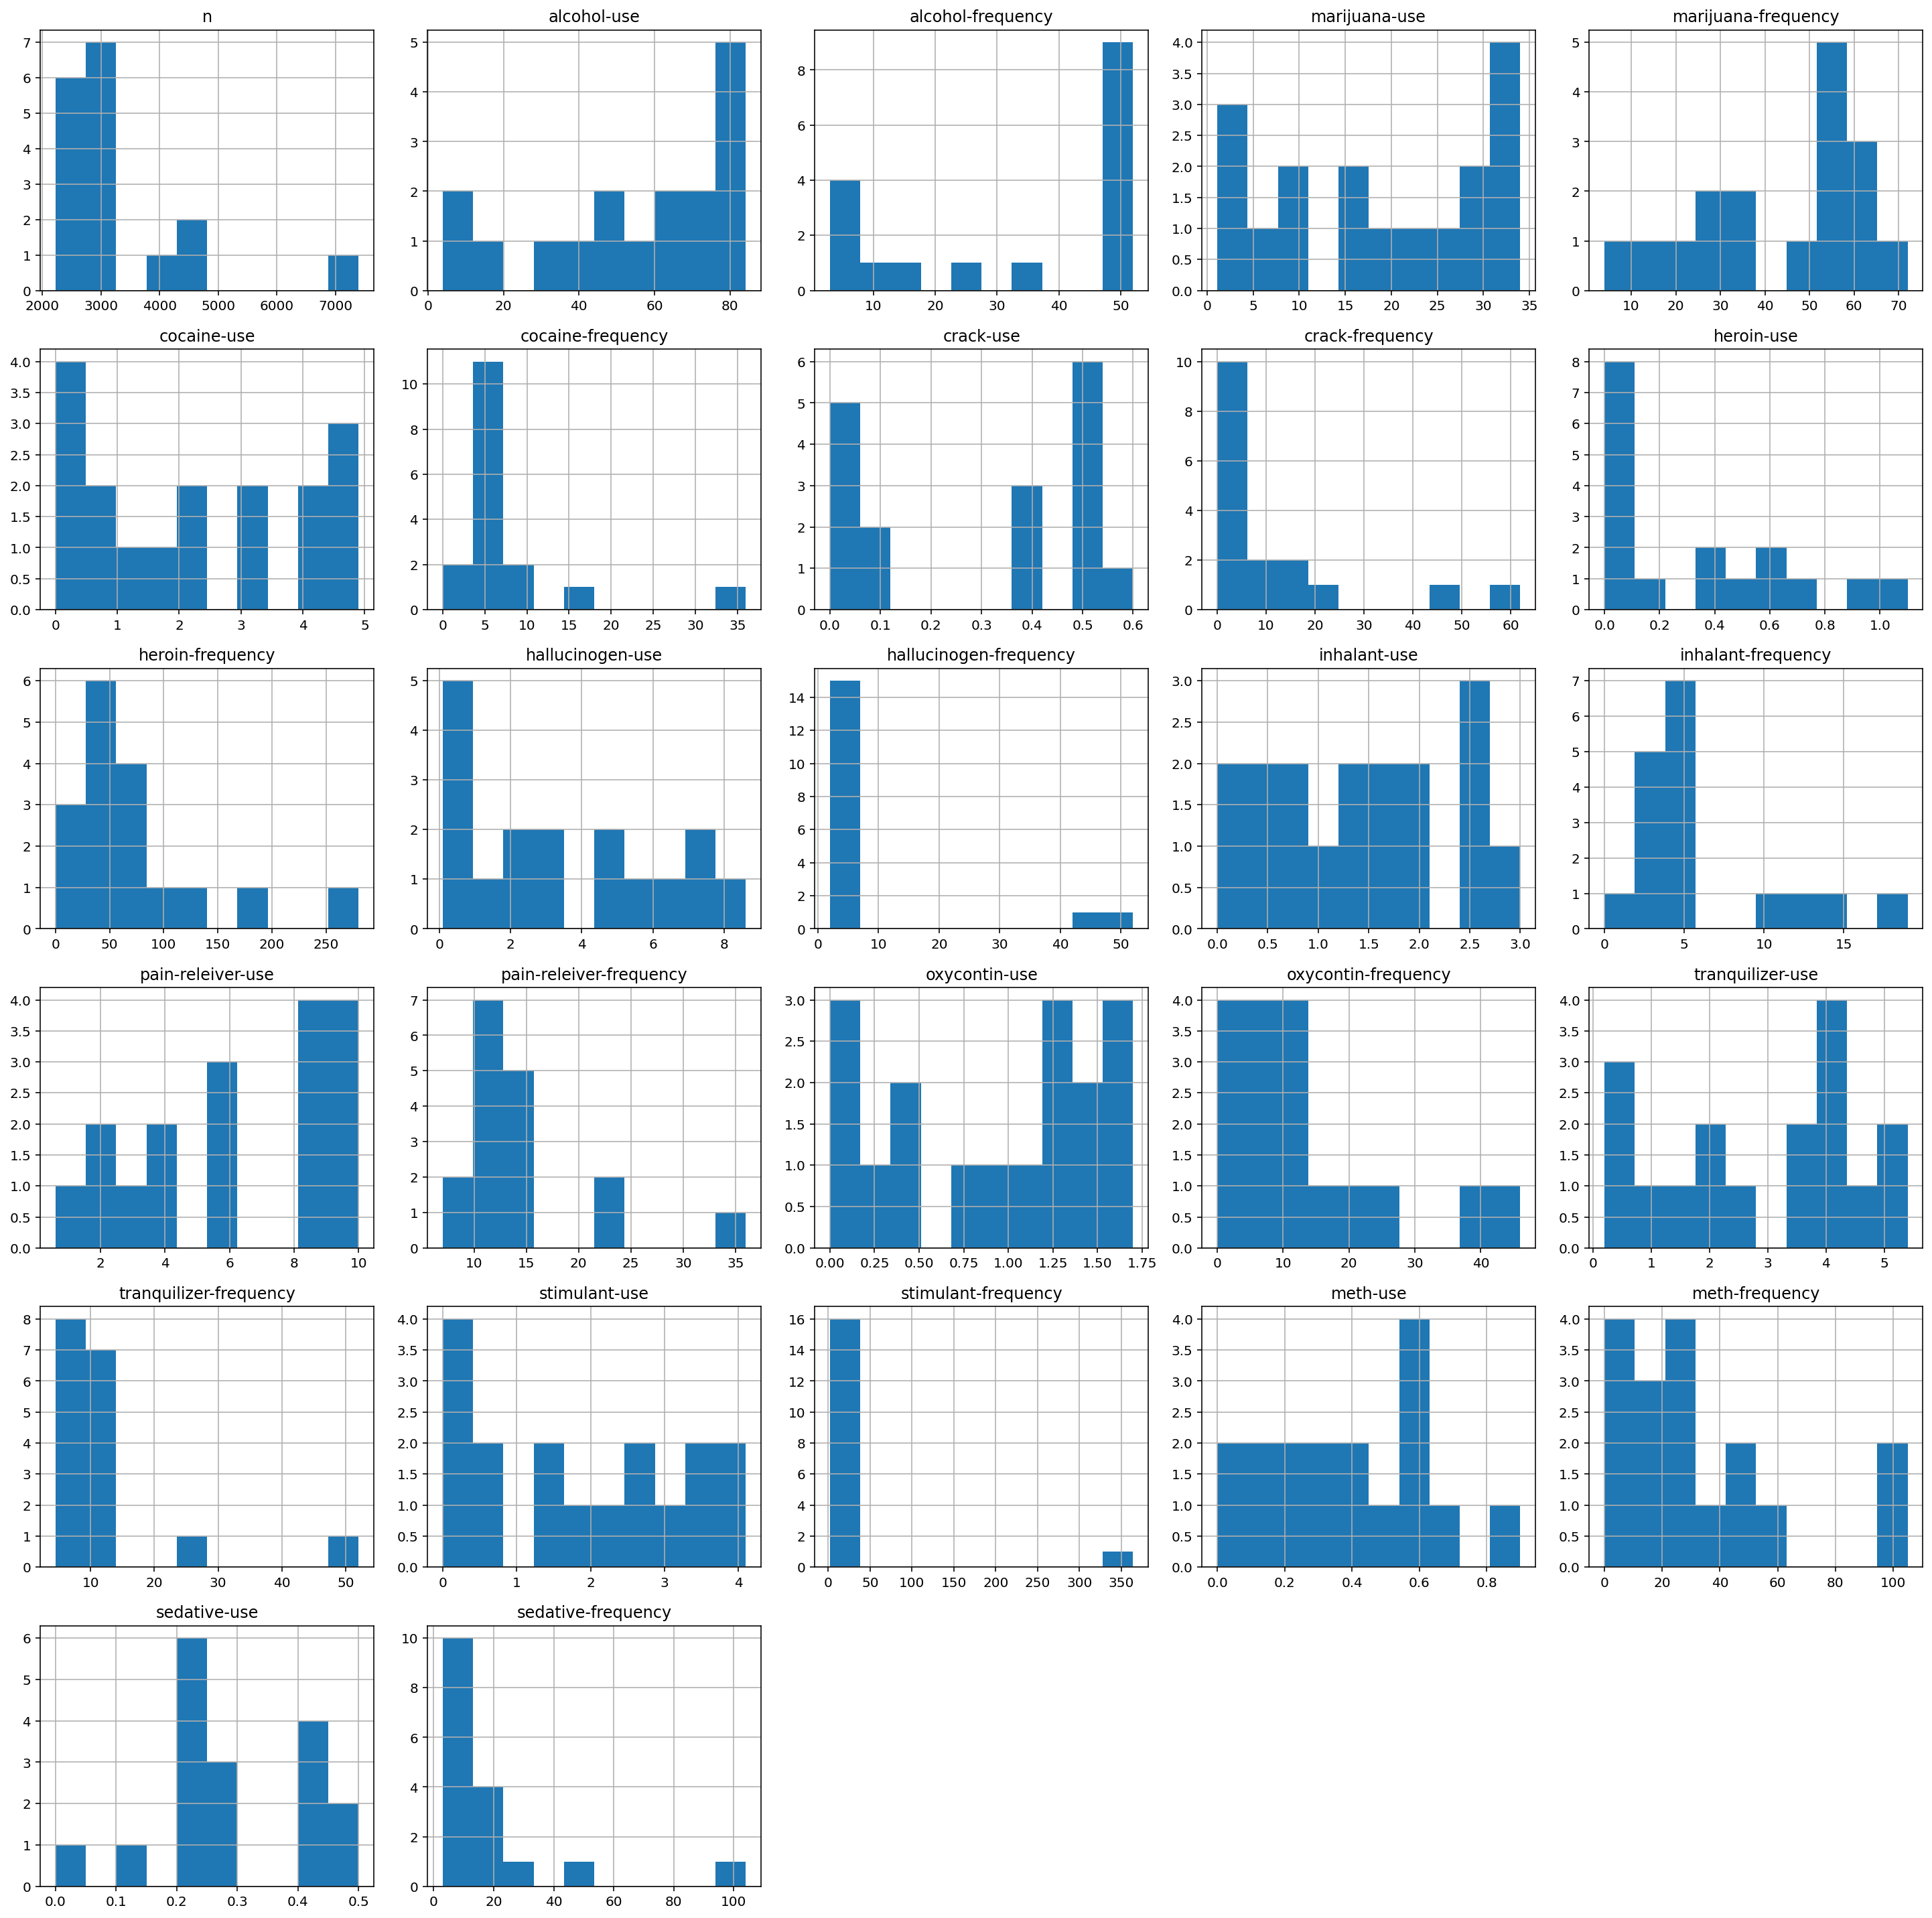

In [74]:
drugs.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

<AxesSubplot:>

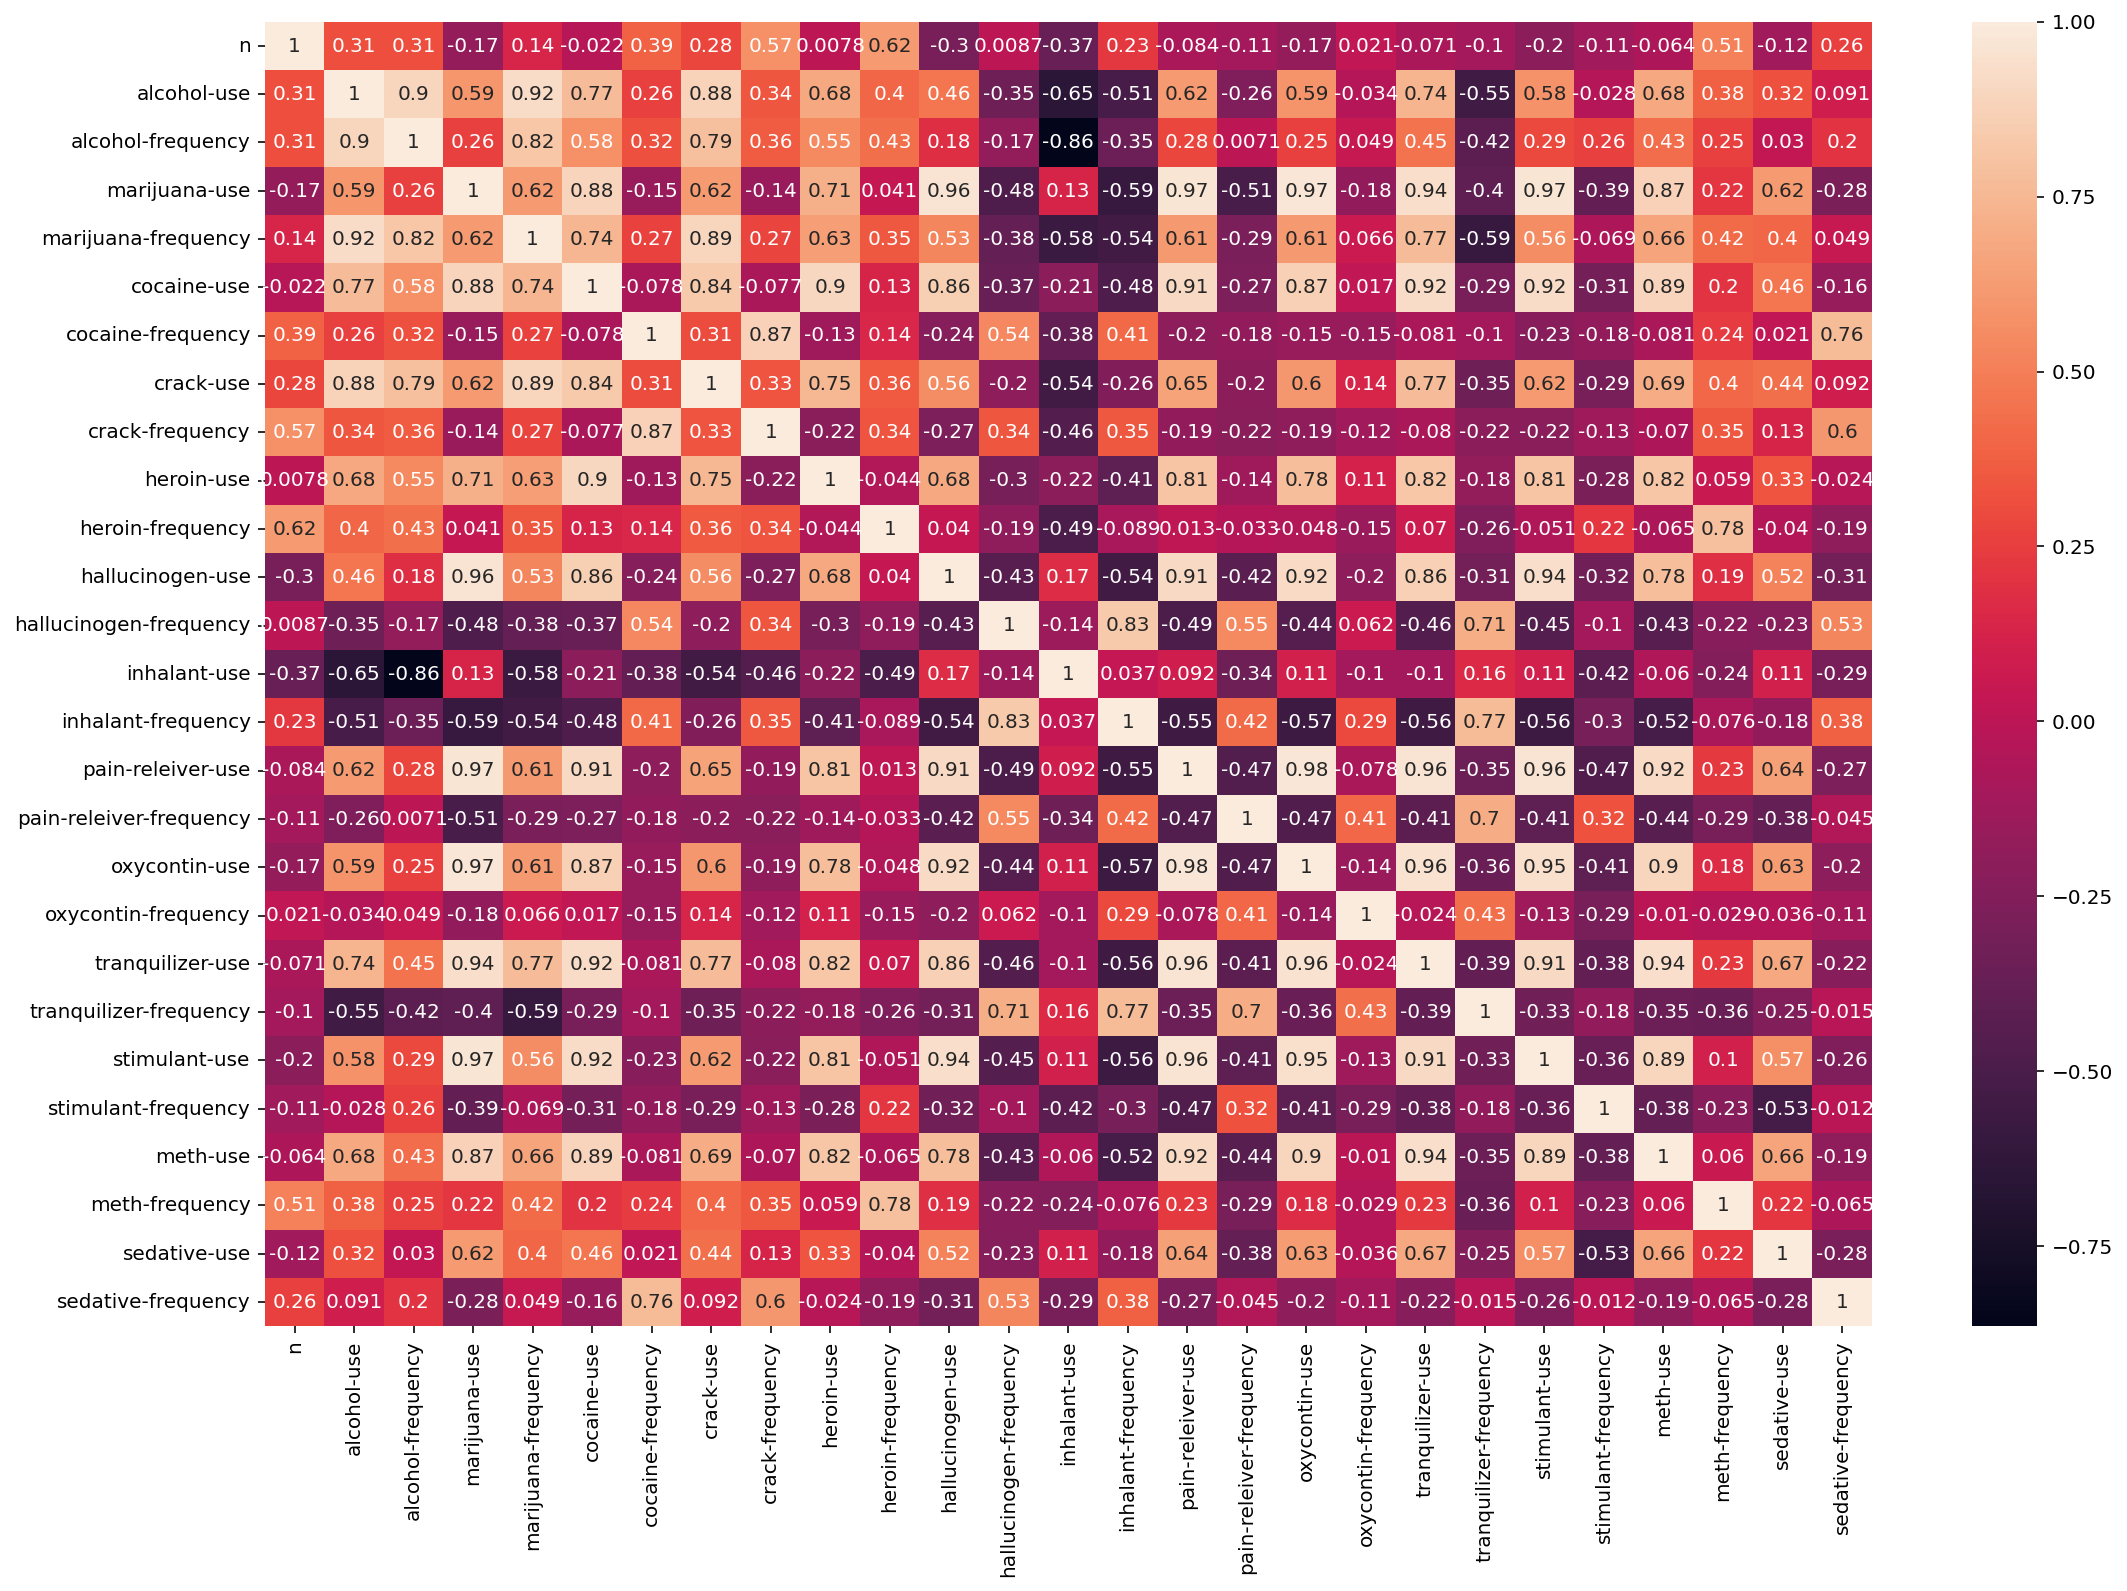

In [75]:
# drugs.corr()
plt.figure(figsize=(18,12))
sns.heatmap(drugs.corr(), annot=True)

In [76]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [77]:
drugs_stnd = var_standardized(drugs.loc[:, 'n':])

In [78]:
drugs_stnd.head(2)

n  alcohol-use  alcohol-frequency  marijuana-use  \
0 -0.349073    -1.917098          -1.423762      -1.490293   
1 -0.380663    -1.745959          -1.283041      -1.297981   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0            -2.120683    -1.142945          -0.300939  -1.247469   
1            -1.521638    -1.142945          -0.800059  -1.247469   

   crack-frequency  heroin-use  ...  oxycontin-use  oxycontin-frequency  \
0        -0.713206   -0.757849  ...      -1.373352             0.818378   
1        -0.540410   -1.057464  ...      -1.373352             2.097236   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0         -1.486206                3.505789      -1.220203   
1         -1.429173                1.198473      -1.149164   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0            -0.339023 -1.455128       -0.985372     -0.596759   
1            -0.315760 -1.074556       -0.830123     -1.321394   

   sedative-frequency  
0           -0.257006  
1           -0.015397  

[2 rows x 27 columns]

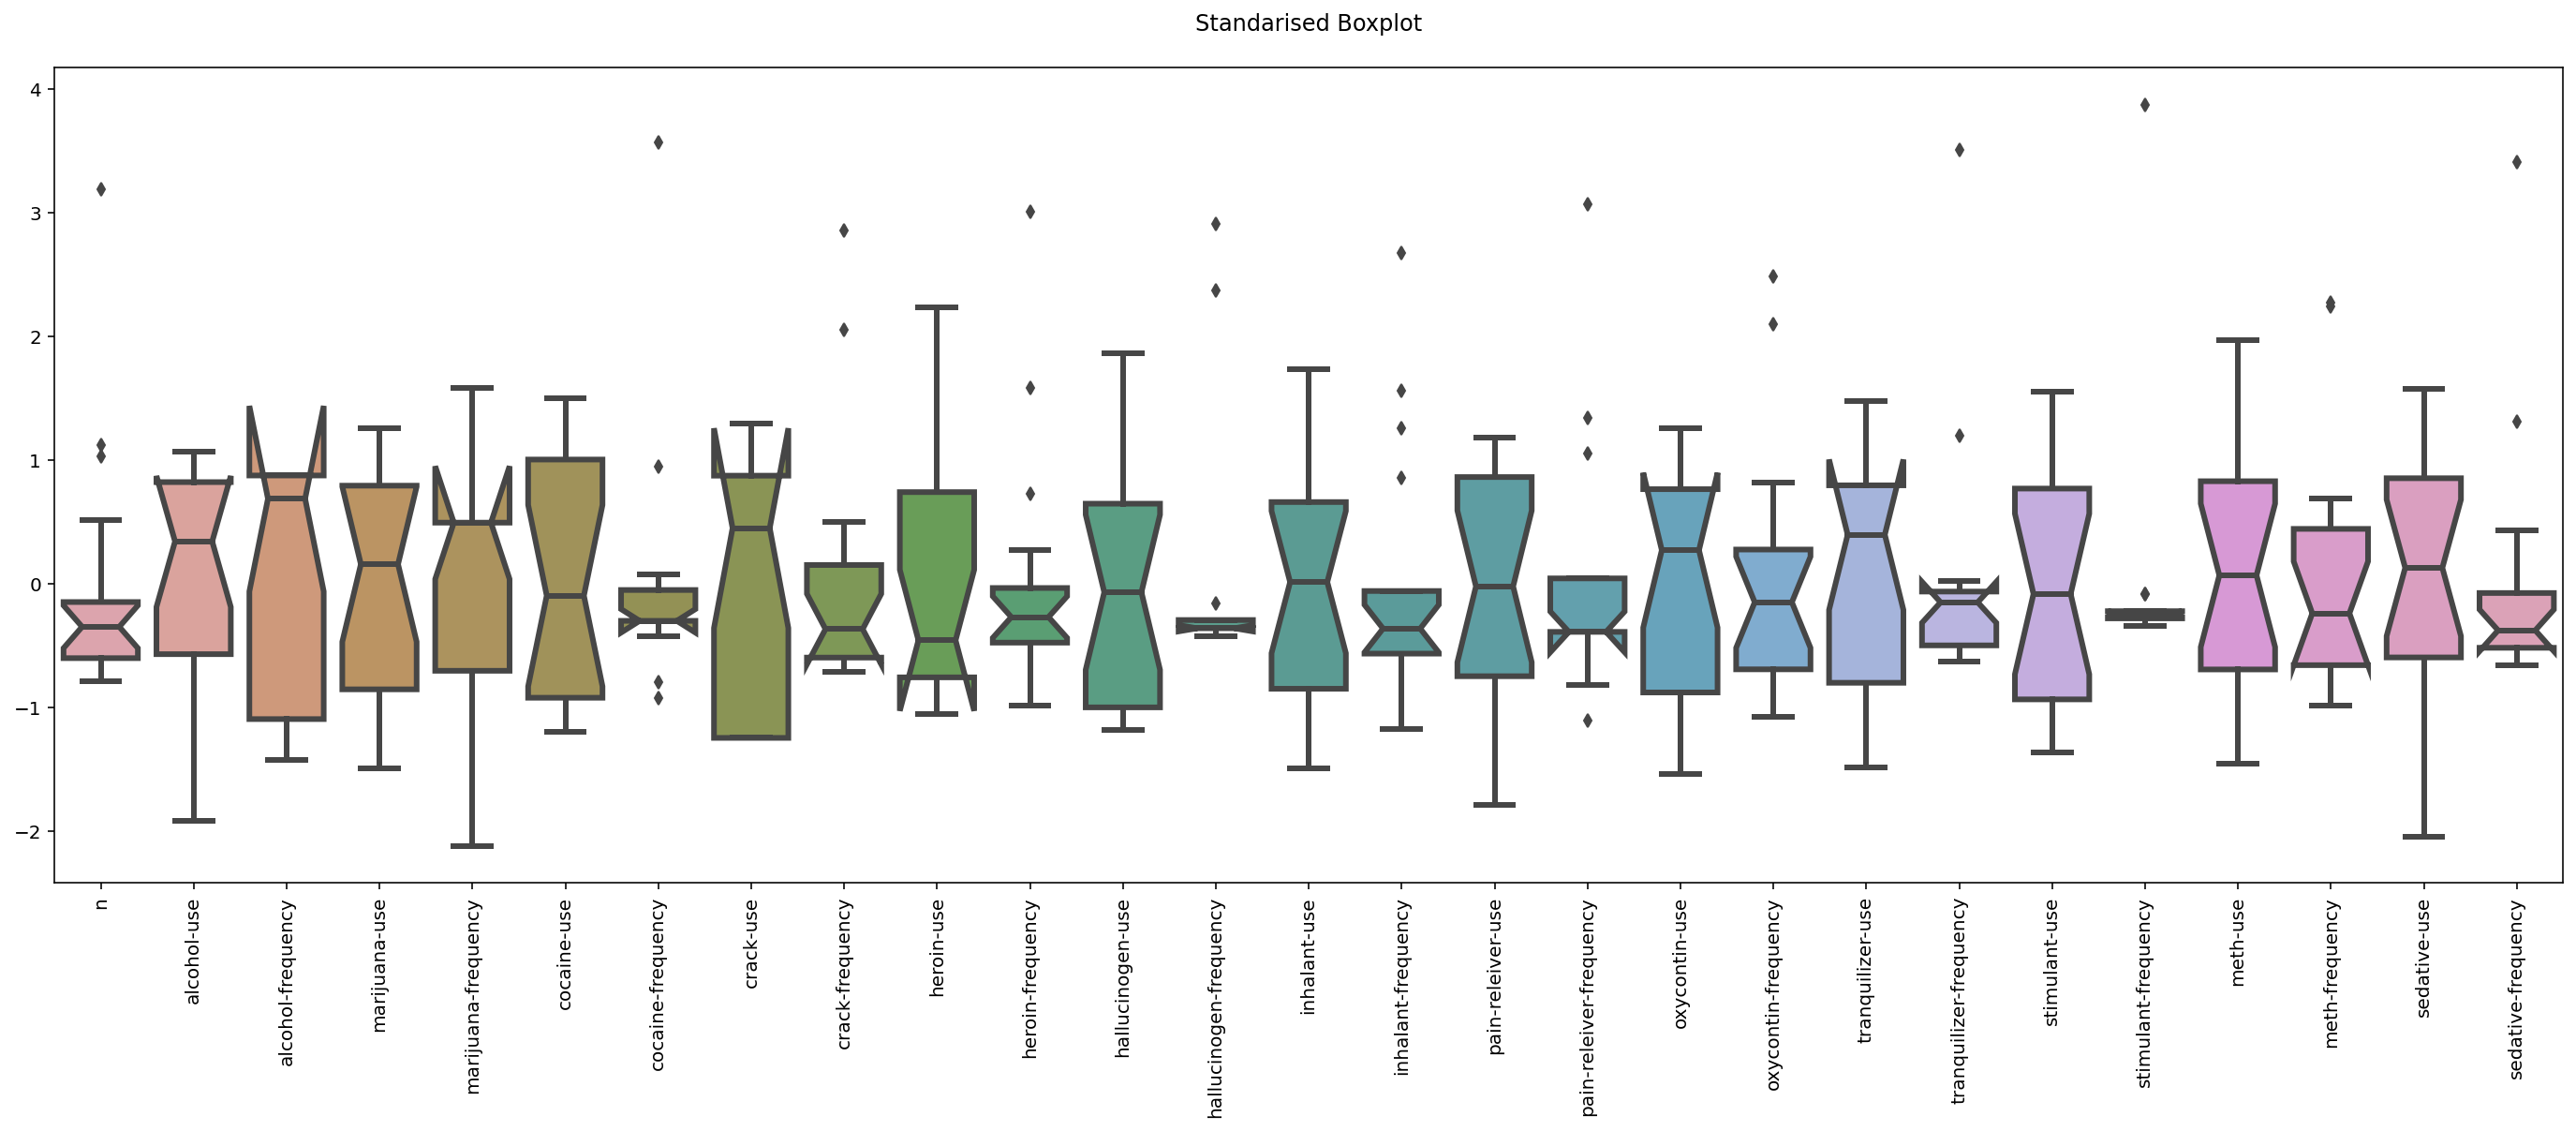

In [79]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.boxplot(data=drugs_stnd, orient='v', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)
ax.set_title('Standarised Boxplot\n')
plt.xticks(rotation = 90)
plt.show()

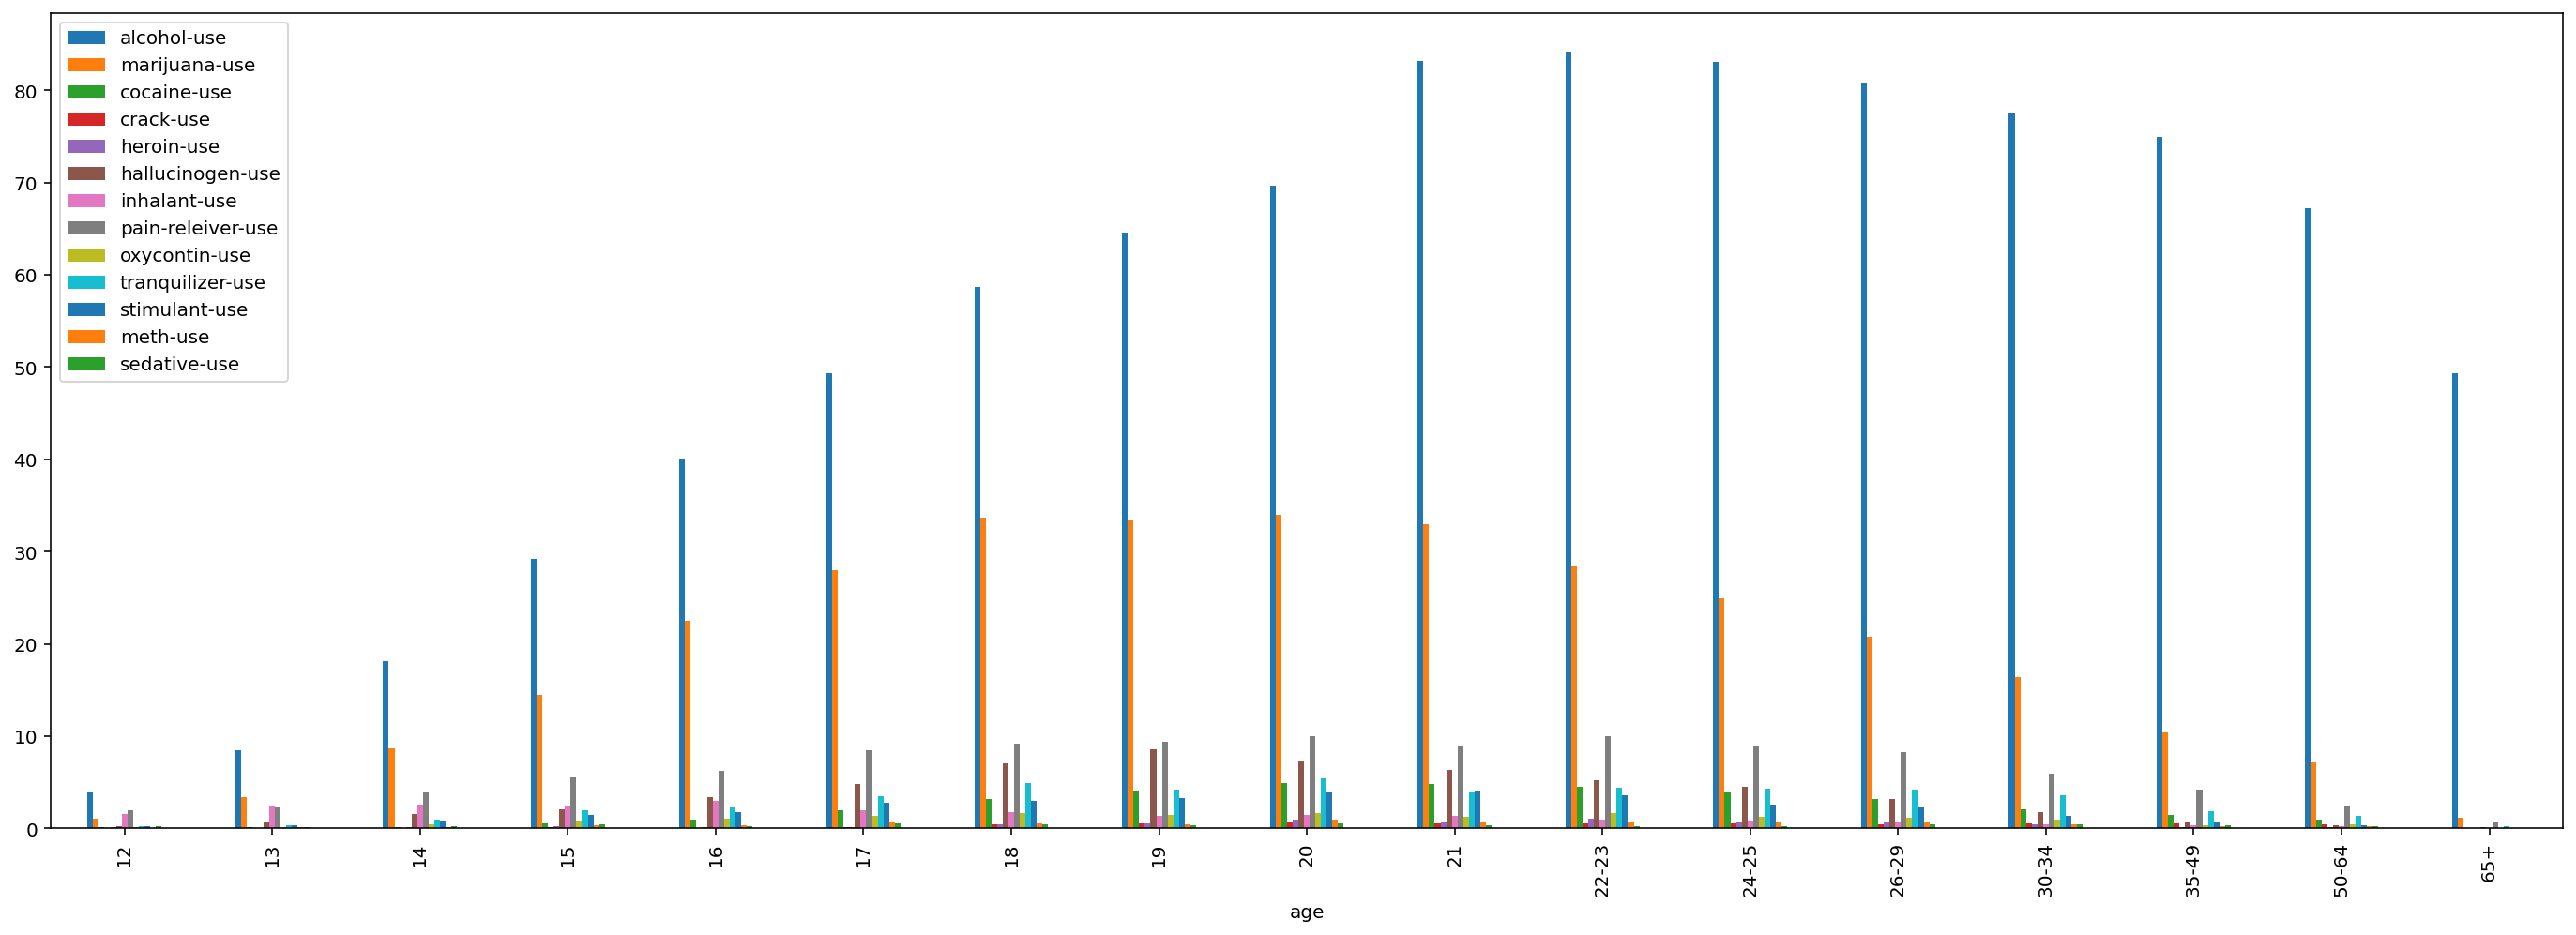

In [80]:
drugs.plot(x='age', y=['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
             'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use'], kind='bar', figsize=(24, 8))
plt.show()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Question**

In line with the WSJ journal article that referred to baby boomer drug use as a 'Woodstock Mentality', my question is, 
    
## Is baby boomer drug use a hangover from the hippy era?

**Hypothesis: There will be little correlation between 'hippy' drug use and 'hard' drug use in boomers**

Looking at the effects and impact on health of the individual and society of 'hippy' drugs vs 'hard' drugs, I hypothesize little to no correlation between them.
 
**Deliverables**

- The drugs of choice from the 60's would be marijuana and hallucinogens.
- So I'd want to see if there is any relationship between those 2 drugs and more harmful drugs
- I'll do this for the boomer age bracket and a younger age bracket
- ...and / or the rest of the ages to see if having lived in the woodstock era had any impact on hard drug use
- I'll use summary statistics, correlation / heatmaps, histograms, boxplots to see if there is any relationship

In [81]:
# Subset the data

drugs_use = drugs.loc[:,['age','alcohol-use', 'marijuana-use','cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
             'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]
drugs_freq = drugs.loc[:,['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
              'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']]
boomers = drugs.iloc[14:17, :]
non_boomers = drugs.iloc[0:14]
hippy_boomers = drugs.loc[14:17, ['age', 'marijuana-use', 'marijuana-frequency', 'hallucinogen-use', 'hallucinogen-frequency']]
hippy_non_boomers = drugs.loc[0:14, ['age', 'marijuana-use', 'marijuana-frequency', 'hallucinogen-use', 'hallucinogen-frequency']]
hard_boomers = drugs.loc[14:17, ['age', 'alcohol-use', 'alcohol-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use','crack-frequency', 'heroin-use', 
'heroin-frequency', 'inhalant-use', 'inhalant-frequency', 'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency', 'tranquilizer-use',
'tranquilizer-frequency', 'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use', 'sedative-frequency']]
hard_non_boomers = drugs.loc[0:14, ['age', 'alcohol-use', 'alcohol-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use','crack-frequency', 'heroin-use', 
'heroin-frequency', 'inhalant-use', 'inhalant-frequency', 'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency', 'tranquilizer-use',
'tranquilizer-frequency', 'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use', 'sedative-frequency']]

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/781896086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_stand = (var-var.mean())/var.std()


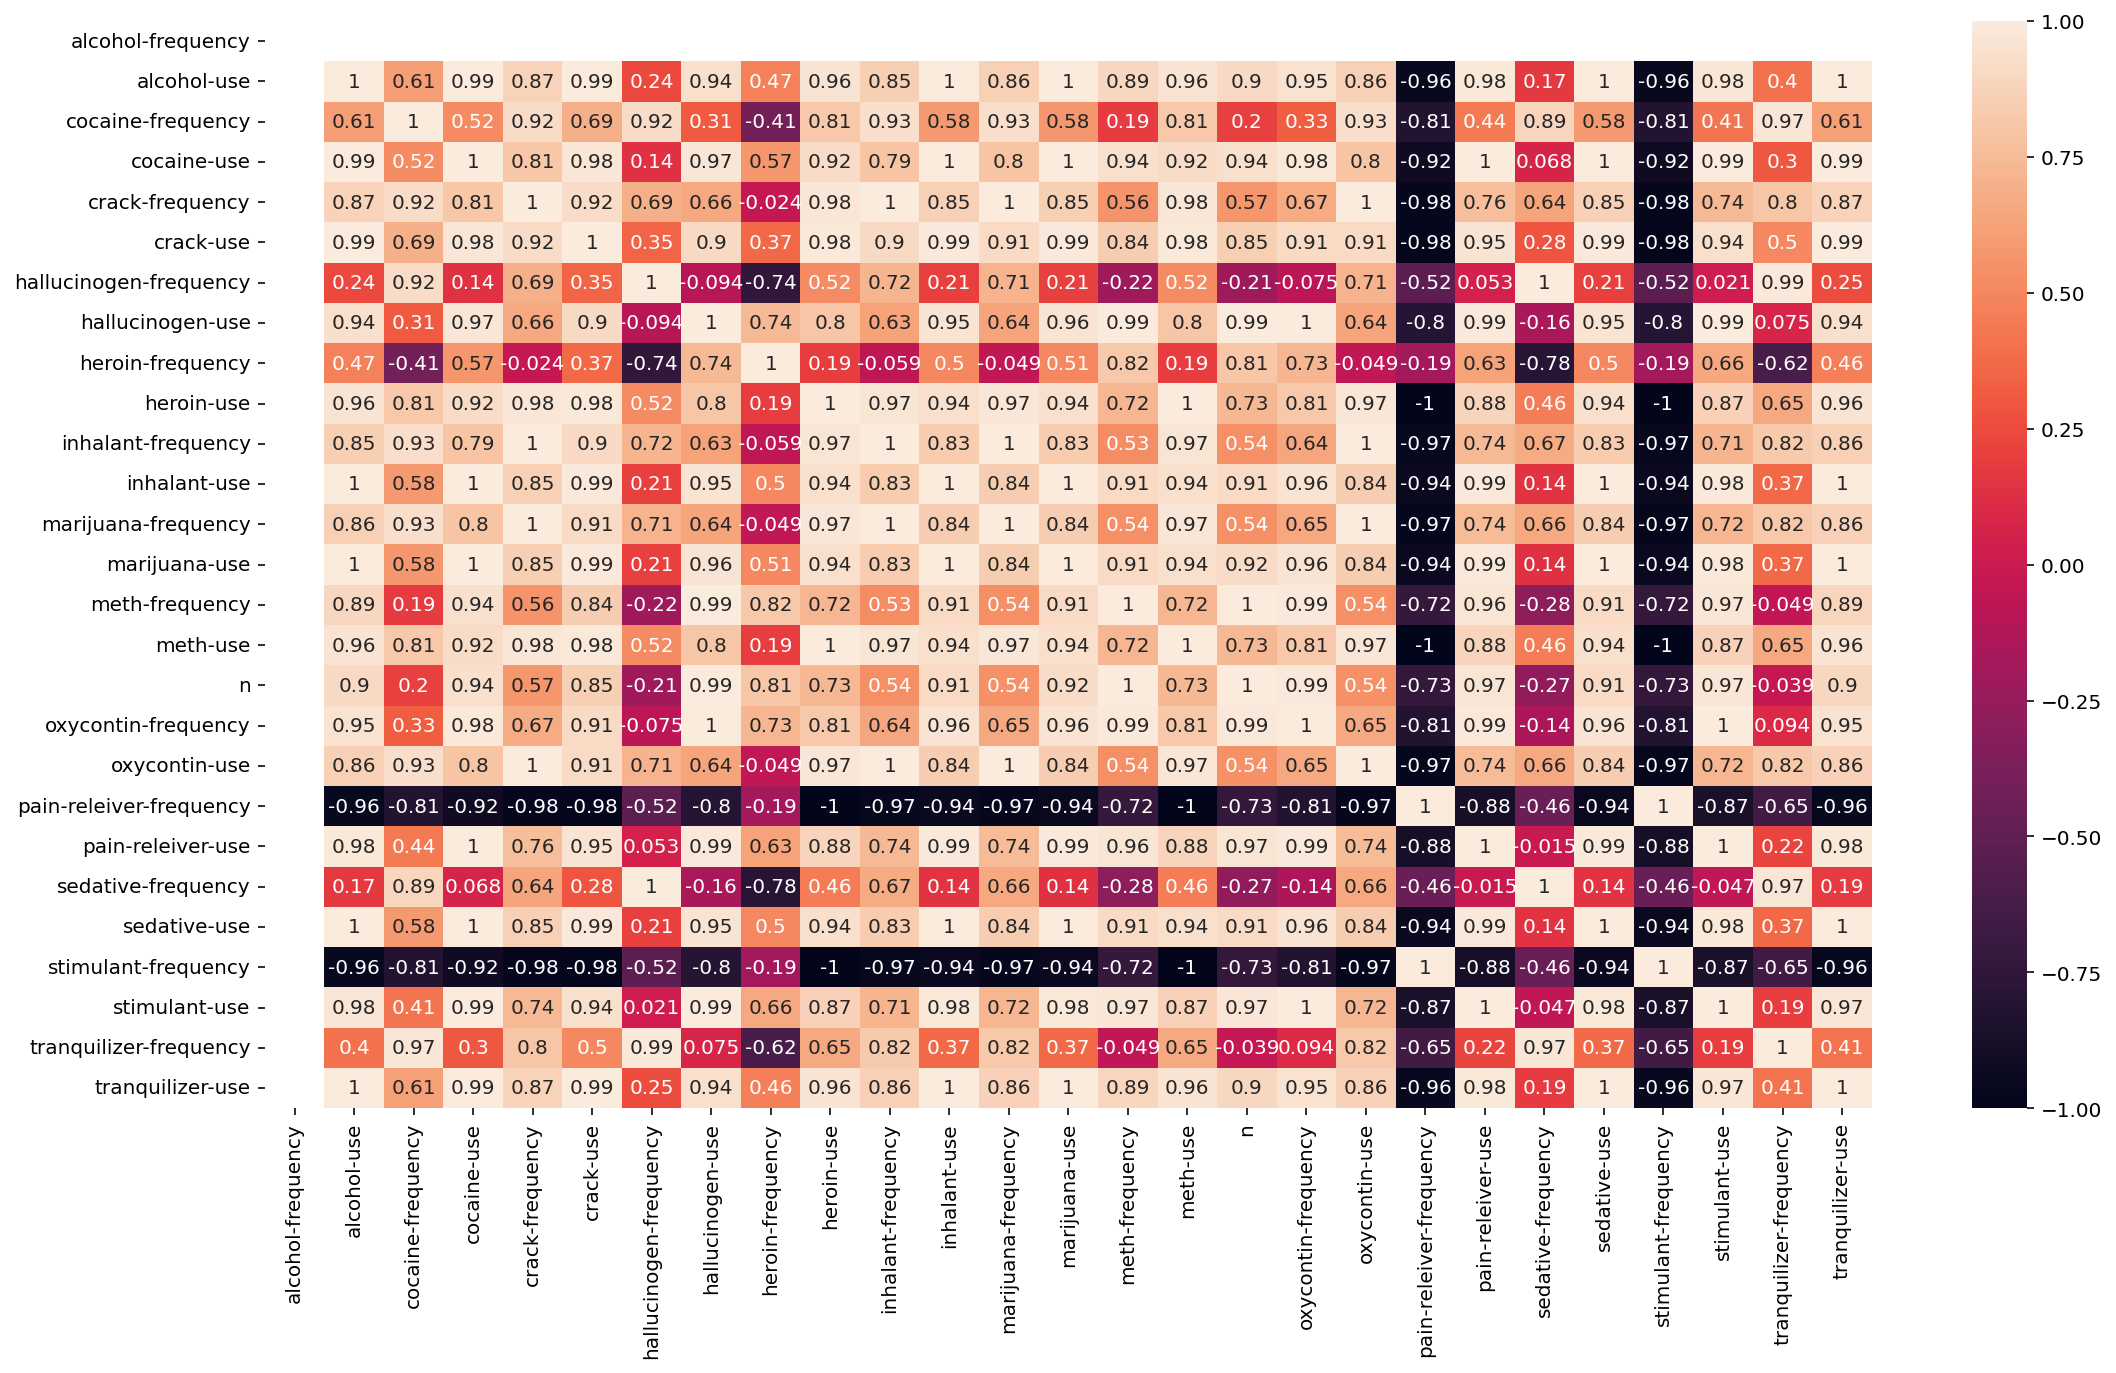

In [82]:
boomers_stand = var_standardized(boomers)
plt.figure(figsize=(18, 10))
sns.heatmap(boomers_stand.corr(), annot=True)
plt.show()

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/781896086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_stand = (var-var.mean())/var.std()


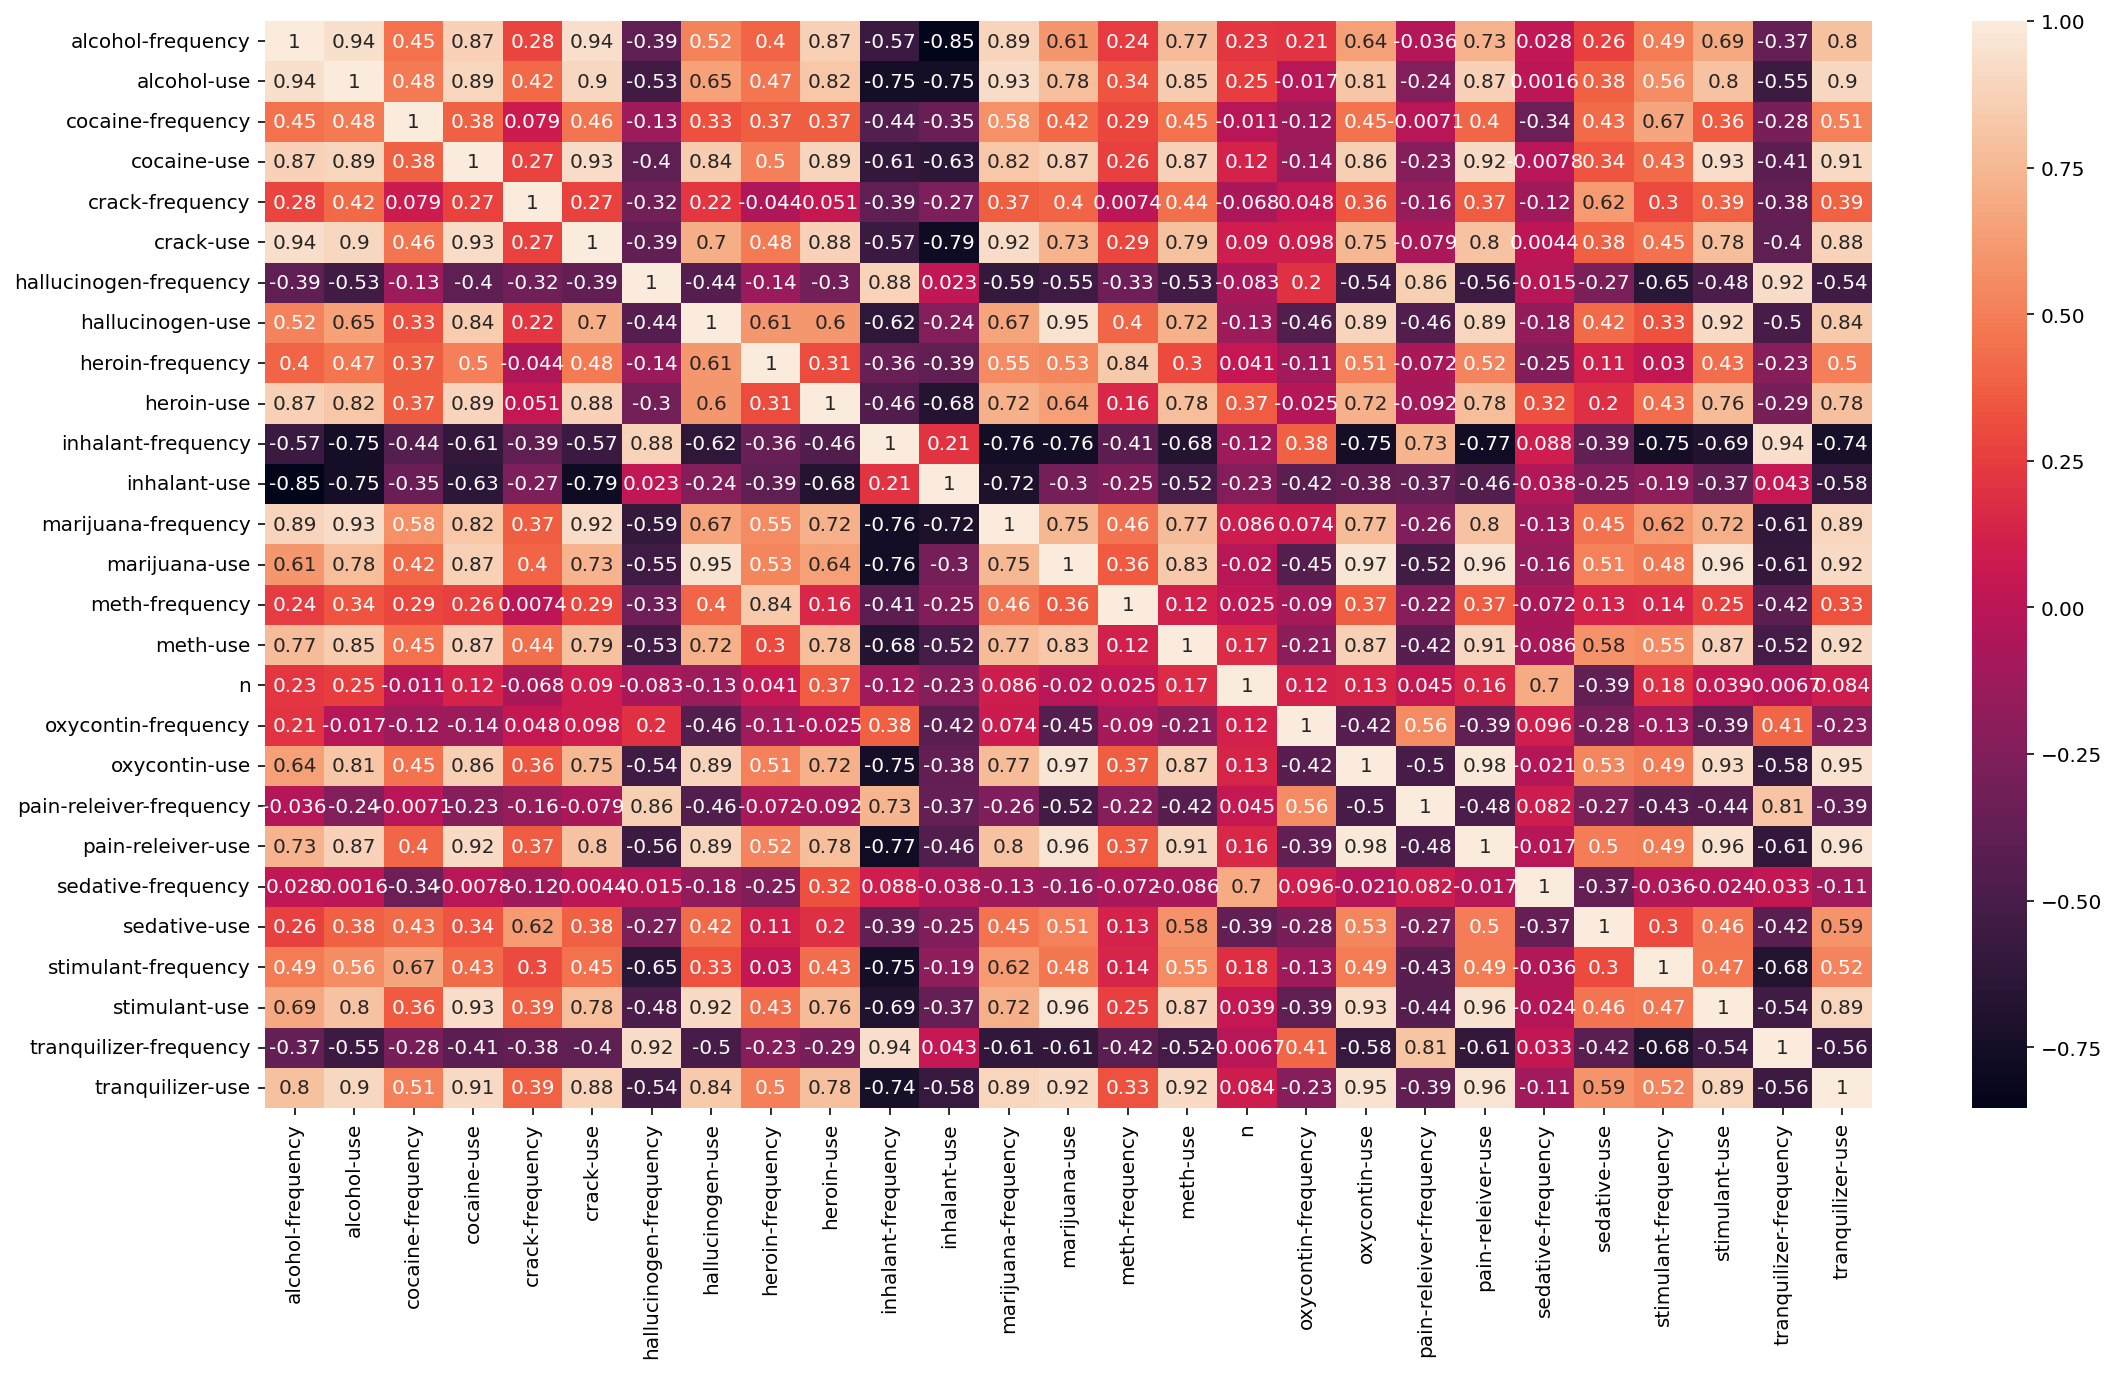

In [83]:
non_boomers_stand = var_standardized(non_boomers)
plt.figure(figsize=(18, 10))
sns.heatmap(non_boomers_stand.corr(), annot=True)
plt.show()

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/781896086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_stand = (var-var.mean())/var.std()


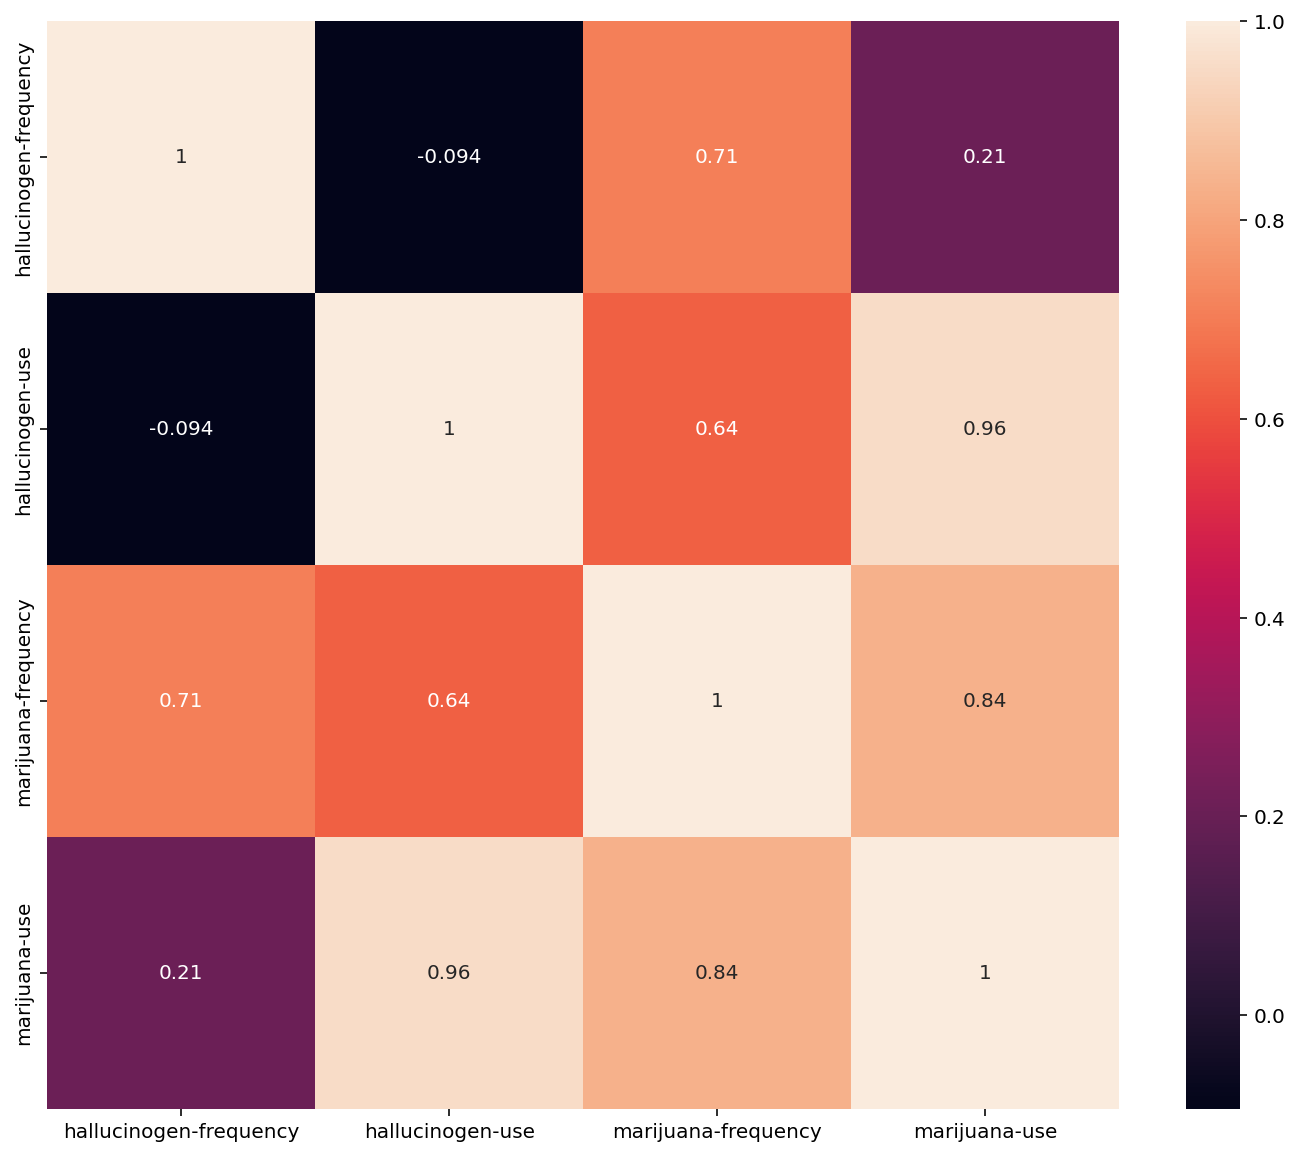

In [84]:
hippy_boomers_stand = var_standardized(hippy_boomers)
plt.figure(figsize=(12, 10))
sns.heatmap(hippy_boomers_stand.corr(), annot=True)
plt.show()

In [85]:
hippy_boomers.describe()

marijuana-use  marijuana-frequency  hallucinogen-use  \
count       3.000000             3.000000          3.000000   
mean        6.300000            45.333333          0.333333   
std         4.680812             8.326664          0.251661   
min         1.200000            36.000000          0.100000   
25%         4.250000            42.000000          0.200000   
50%         7.300000            48.000000          0.300000   
75%         8.850000            50.000000          0.450000   
max        10.400000            52.000000          0.600000   

       hallucinogen-frequency  
count                3.000000  
mean                16.333333  
std                 23.965253  
min                  2.000000  
25%                  2.500000  
50%                  3.000000  
75%                 23.500000  
max                 44.000000

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/781896086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_stand = (var-var.mean())/var.std()


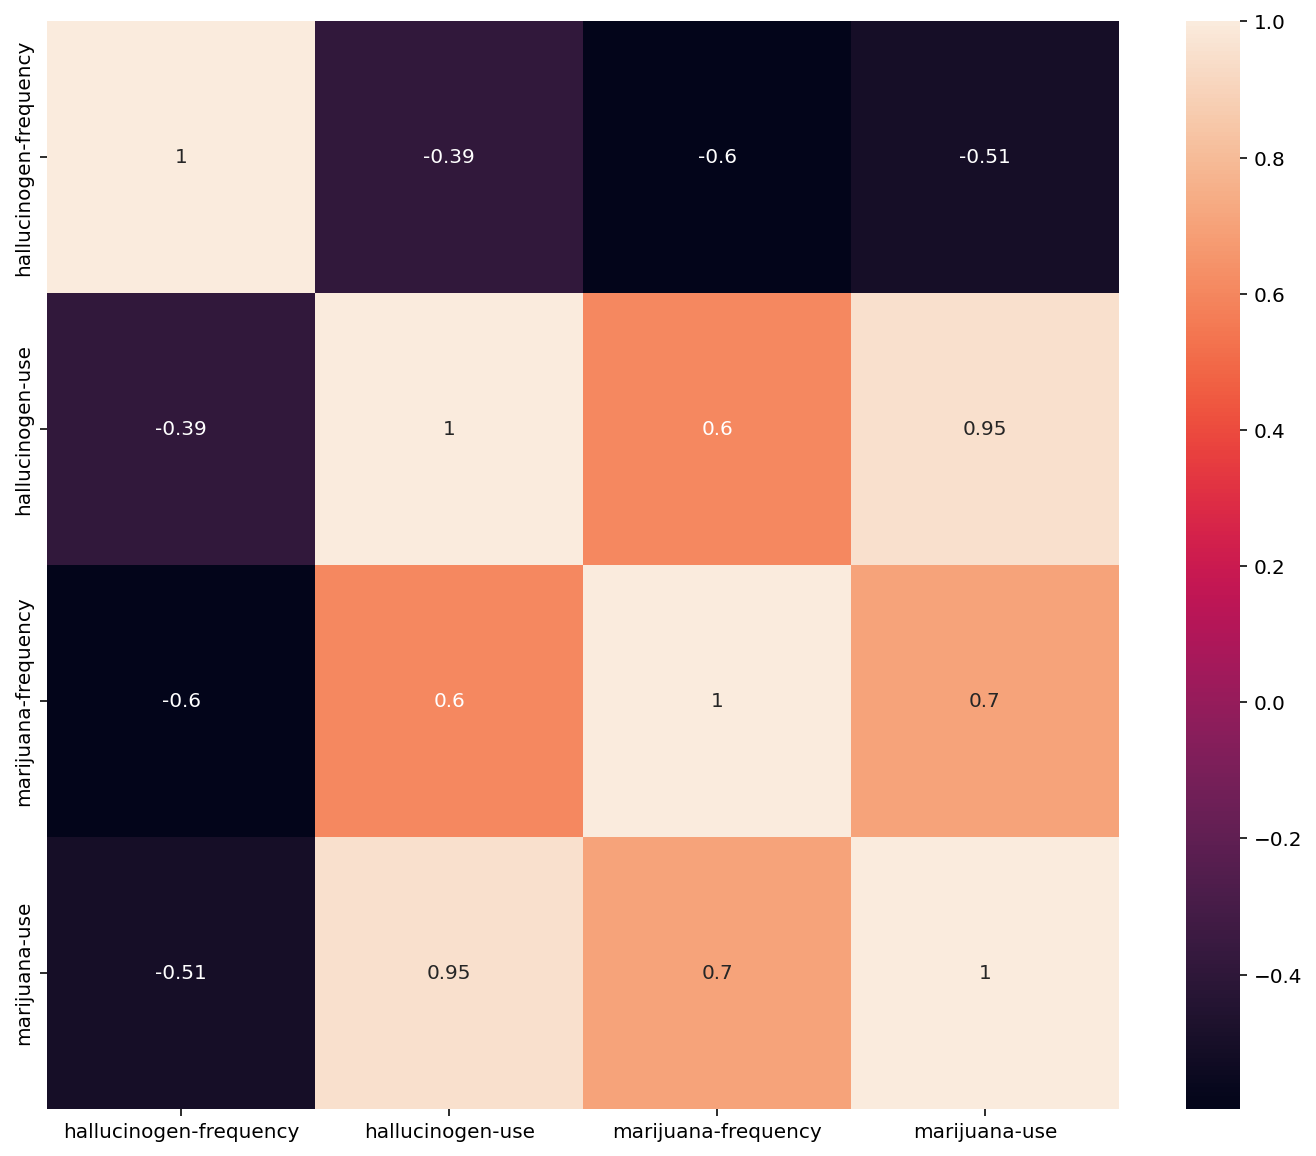

In [86]:
hippy_non_boomers_stand = var_standardized(hippy_non_boomers)
plt.figure(figsize=(12, 10))
sns.heatmap(hippy_non_boomers_stand.corr(), annot=True)
plt.show()

/var/folders/kq/52z34zbj4gncr2vv4gl6xj0m0000gn/T/ipykernel_29057/781896086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_stand = (var-var.mean())/var.std()


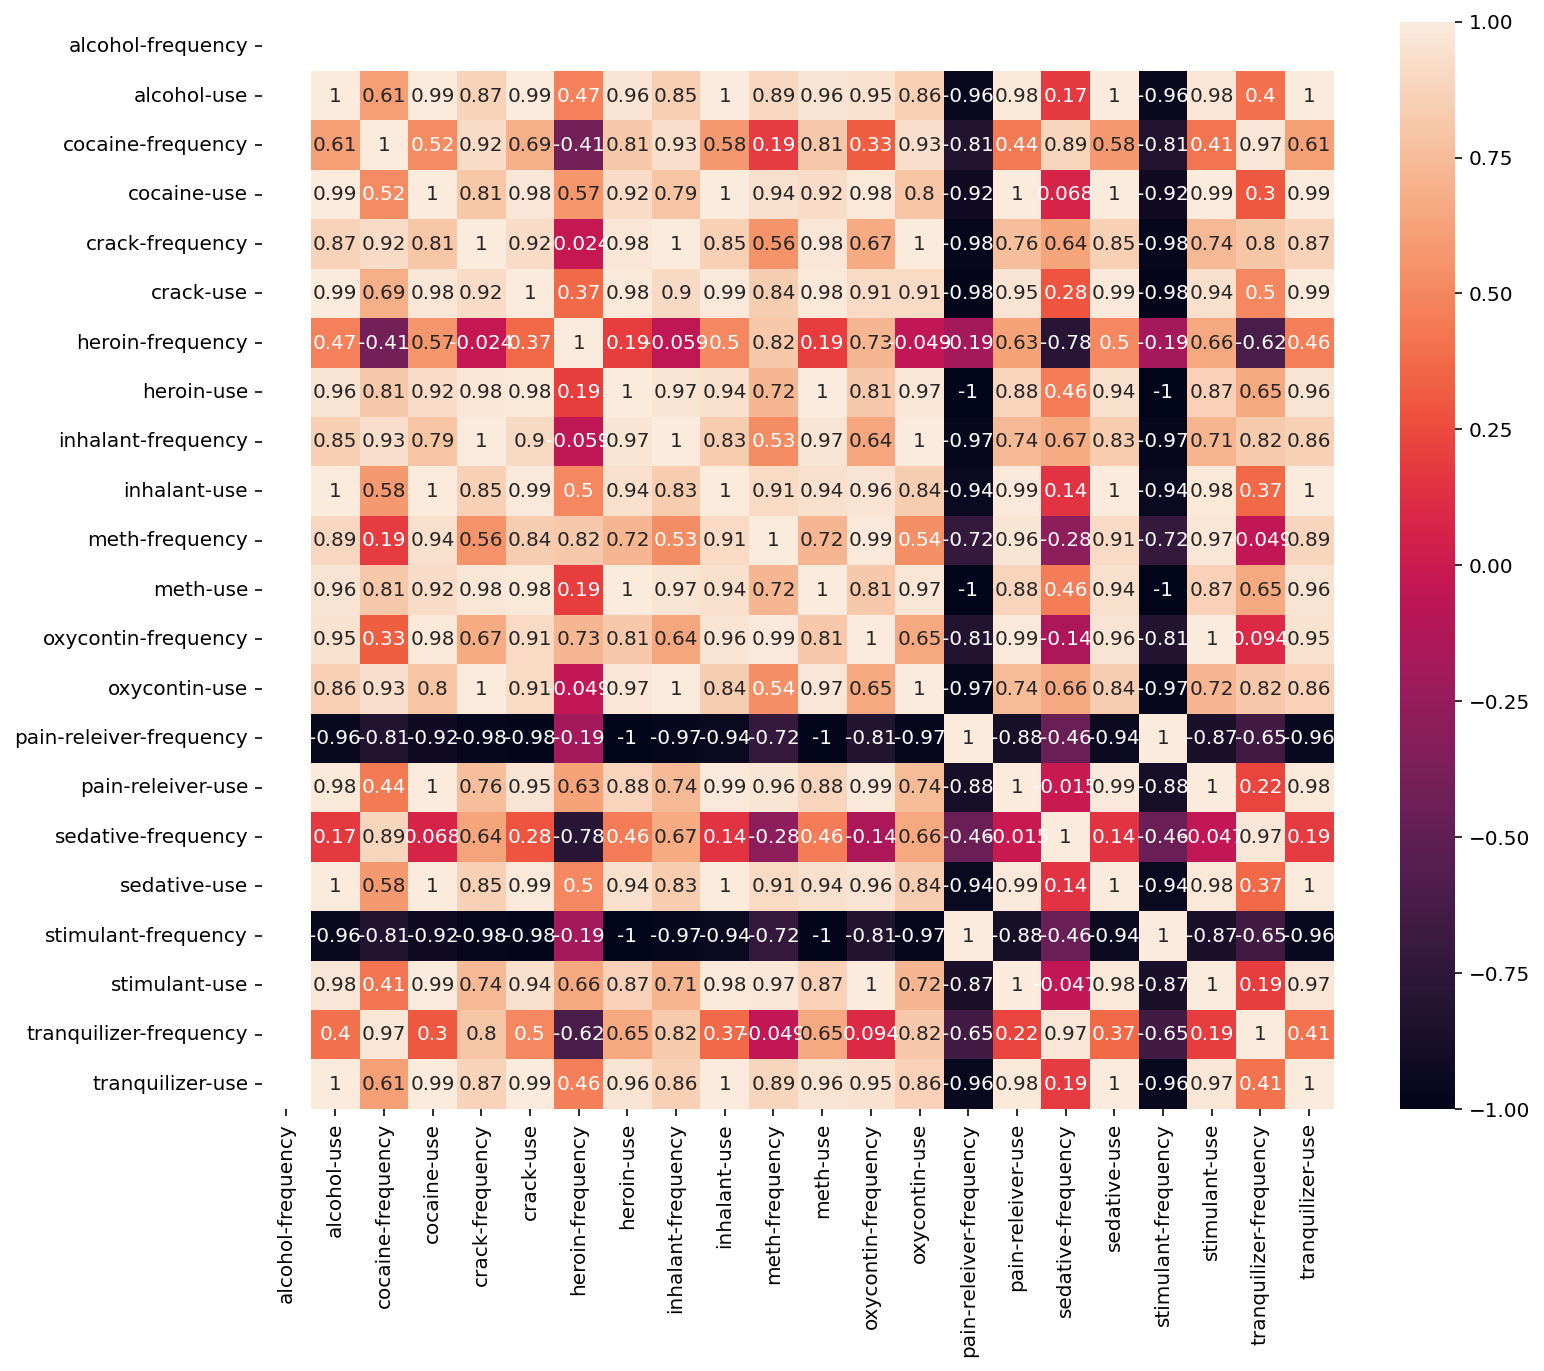

In [87]:
hard_boomers_stand = var_standardized(hard_boomers)
plt.figure(figsize=(12, 10))
sns.heatmap(hard_boomers_stand.corr(), annot=True)
plt.show()

All-round drug use does not seem to have any strong correlation with hallucinogen or marijuana use, if anything, when those two drugs are removed from the equation there are greater correlations, and by extension more drug use all around. Part of that can be explained by the low frequency of hallucinogen by all age groups but you could also argue my point; no strong positive correlations between 'hippy' drugs and age demographics.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [88]:
rate = sat_scores.Rate

In [89]:
rate.head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

In [90]:
rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

<AxesSubplot:>

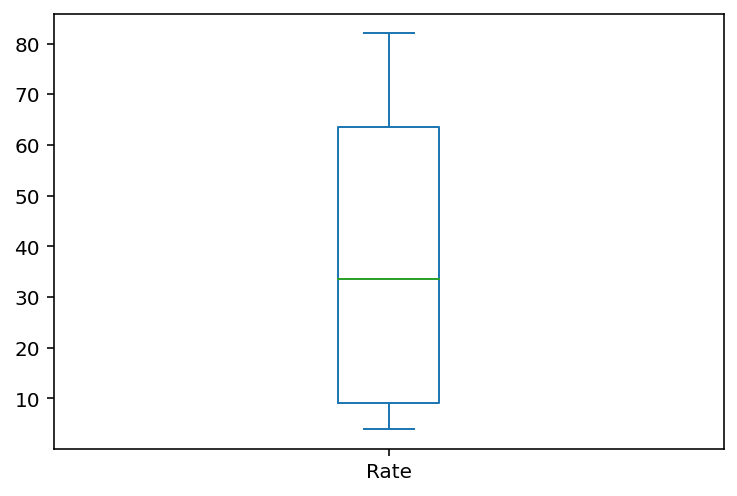

In [91]:
rate.plot.box()

<AxesSubplot:ylabel='Frequency'>

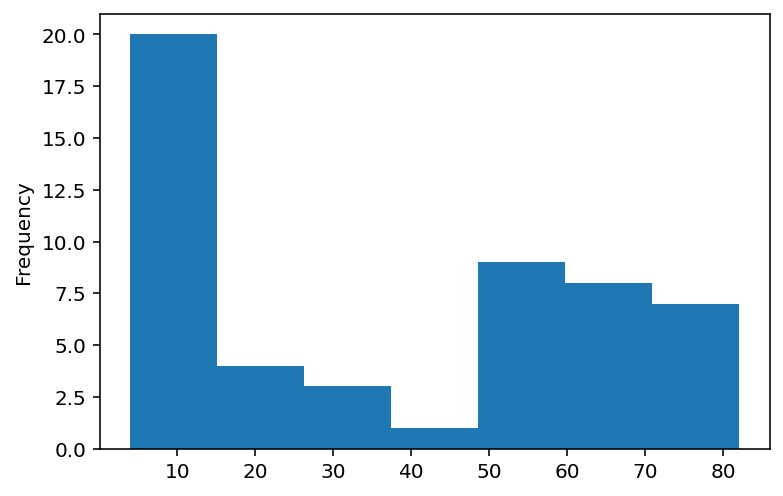

In [92]:
rate.plot.hist(bins=7)

In [93]:
IQR = rate.describe()['75%'] - rate.describe()['25%']

In [94]:
# Outliers are values that are greater than the 75th percentile value plus 1.5 times the inter quartile range

if rate.describe()['max'] < rate.describe()['75%'] + (1.5 * IQR):
    
    upperbound = rate.describe()['max']
    
else:
    
    upperbound = rate.describe()['75%'] + (1.5 * IQR)

In [95]:
# or less than the 25th percentile value minus 1.5 times the inter quartile range
if rate.describe()['min'] >  rate.describe()['25%'] - (1.5 * IQR):
    
    lowerbound = rate.describe()['min']
    
else:
    
    lowerbound = rate.describe()['25%'] - (1.5 * IQR)

In [96]:
IQR, upperbound, lowerbound

(54.5, 82.0, 4.0)

In [97]:
rate[rate > upperbound]

Series([], Name: Rate, dtype: int64)

In [98]:
rate[rate < lowerbound]

Series([], Name: Rate, dtype: int64)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [99]:
sat_scores[['Verbal', 'Math']].corr(method='spearman')

Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000

In [100]:
sat_scores[['Verbal', 'Math']].corr(method='pearson')

Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000

In [101]:
stats.spearmanr(sat_scores[['Verbal','Math']])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [102]:
# https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#:~:text=%2C%20is%20a%20nonparametric%20measure%20of,described%20using%20a%20monotonic%20function.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [103]:
sat_scores['RatePercentile']=sat_scores['Rate'].apply(lambda x: round(stats.percentileofscore(sat_scores['Rate'],score=x),0));
sat_scores[sat_scores['State']=='CA']

State  Rate  Verbal  Math  V_M_Diff  RatePercentile
23    CA    51     498   517       -19            57.0

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

In [104]:
sat_scores['MathPercentile']=sat_scores['Math'].apply(lambda x: round(stats.percentileofscore(sat_scores['Math'],score=x),0));
sat_scores['VerbalPercentile']=sat_scores['Verbal'].apply(lambda x: round(stats.percentileofscore(sat_scores['Verbal'],score=x),0));